# Funcionalidad de Grafos - Demostración Completa

Este notebook demuestra las principales funcionalidades de los grafos usando NetworkX y visualizaciones con Matplotlib. Exploraremos diferentes tipos de grafos, algoritmos de búsqueda y propiedades importantes.

## Contenido:
1. Importación de librerías necesarias
2. Creación de estructuras básicas de grafos
3. Adición de nodos y aristas
4. Visualización de grafos
5. Algoritmos de recorrido (BFS y DFS)
6. Cálculo de propiedades del grafo
7. Operaciones avanzadas con grafos

## 1. Importar Librerías Necesarias

Primero importamos todas las librerías que necesitaremos para trabajar con grafos y crear visualizaciones.

In [1]:
# Importar librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print(f"NetworkX versión: {nx.__version__}")
print("¡Listo para trabajar con grafos!")

✅ Librerías importadas correctamente
NetworkX versión: 3.5
¡Listo para trabajar con grafos!


## 1.1. Conceptos Fundamentales de Grafos

Antes de trabajar con ejemplos prácticos, es importante entender los conceptos teóricos fundamentales de los grafos. A continuación se presentan las definiciones más importantes:

### 🔸 **Conceptos Básicos de Estructura**

**📌 Grafo Dirigido (Directed Graph o Digraph)**
- Un grafo donde las aristas tienen dirección
- Se representa como G = (V, E) donde las aristas son pares ordenados (u, v)
- La arista va del vértice u al vértice v

**📌 Arco Dirigido (Directed Edge/Arc)**
- Una arista en un grafo dirigido que tiene dirección específica
- Se denota como (u, v) donde u es el vértice origen y v es el vértice destino
- También llamado "arco" en grafos dirigidos

**📌 Grafo Ponderado (Weighted Graph)**
- Un grafo donde cada arista tiene un peso o costo asociado
- El peso puede representar distancia, tiempo, costo, capacidad, etc.
- Se denota como w(u, v) para el peso de la arista entre u y v

### 🔸 **Conceptos de Relación entre Vértices**

**📌 Arco Incidente (Incident Edge)**
- Una arista es incidente a un vértice si ese vértice es uno de sus extremos
- En grafos dirigidos: una arista (u, v) es incidente saliente de u e incidente entrante de v
- El grado de un vértice es el número de aristas incidentes a él

**📌 Arco Adyacente (Adjacent Edges)**
- Dos aristas son adyacentes si comparten un vértice común
- Por ejemplo: las aristas (a, b) y (b, c) son adyacentes porque comparten el vértice b
- En grafos dirigidos, se considera la dirección para determinar adyacencia

**📌 Vértices Adyacentes (Adjacent Vertices)**
- Dos vértices son adyacentes si existe una arista que los conecta directamente
- En grafos dirigidos: v es adyacente a u si existe una arista (u, v)

### 🔸 **Conceptos de Caminos y Recorridos**

**📌 Caminata (Walk)**
- Una secuencia de vértices v₁, v₂, ..., vₖ donde cada par consecutivo está conectado por una arista
- Permite repetir vértices y aristas
- La longitud es el número de aristas en la secuencia
- Ejemplo: A → B → C → B → D (permite volver a B)

**📌 Caminata Dirigida (Directed Walk)**
- Una caminata en un grafo dirigido donde se debe respetar la dirección de las aristas
- Cada arista (vᵢ, vᵢ₊₁) debe existir en la dirección especificada
- Fundamental para algoritmos de recorrido en grafos dirigidos

**📌 Ruta o Camino Simple (Path)**
- Una caminata donde todos los vértices son distintos (excepto posiblemente el primero y último)
- No repite vértices intermedios
- Representa el camino más directo entre dos puntos
- Ejemplo: A → B → C → D (sin repetir vértices)

**📌 Ciclo (Cycle)**
- Una caminata cerrada donde el vértice inicial y final son el mismo
- En caminos simples: todos los vértices intermedios son distintos
- Longitud mínima: 3 vértices para grafos simples
- Ejemplo: A → B → C → A

### 🔸 **Conceptos de Costos y Optimización**

**📌 Costo de Ruta (Path Cost)**
- En grafos ponderados, la suma de los pesos de todas las aristas en un camino
- Se calcula como: costo(camino) = Σ w(uᵢ, uᵢ₊₁) para todas las aristas del camino
- Fundamental para encontrar caminos más cortos o de menor costo
- Usado en algoritmos como Dijkstra y Floyd-Warshall

**📌 Camino Más Corto (Shortest Path)**
- El camino entre dos vértices con el menor costo total
- En grafos no ponderados: el camino con menor número de aristas
- En grafos ponderados: el camino con menor suma de pesos
- Puede no ser único (múltiples caminos con el mismo costo mínimo)

### 🔸 **Conceptos de Conectividad**

**📌 Conectividad (Connectivity)**
- Propiedad que describe cómo están interconectados los vértices de un grafo
- En grafos no dirigidos: existe un camino entre cualquier par de vértices
- Determina si el grafo es una sola "pieza" o está fragmentado en componentes

**📌 Accesibilidad (Reachability)**
- Un vértice v es accesible desde u si existe un camino de u a v
- En grafos dirigidos: la accesibilidad puede ser unidireccional
- Fundamental para análisis de flujo y dependencias

**📌 Grafo Conexo (Connected Graph)**
- Un grafo no dirigido donde existe un camino entre cualquier par de vértices
- Todos los vértices están en la misma componente conexa
- Si no es conexo, se divide en componentes conexas separadas

**📌 Grafo Fuertemente Conexo (Strongly Connected Graph)**
- Un grafo dirigido donde para cualquier par de vértices u, v existe:
  - Un camino dirigido de u a v, Y
  - Un camino dirigido de v a u
- Más restrictivo que la conectividad simple
- Si no es fuertemente conexo, puede tener componentes fuertemente conexas

📚 Creando ejemplos visuales de conceptos fundamentales...



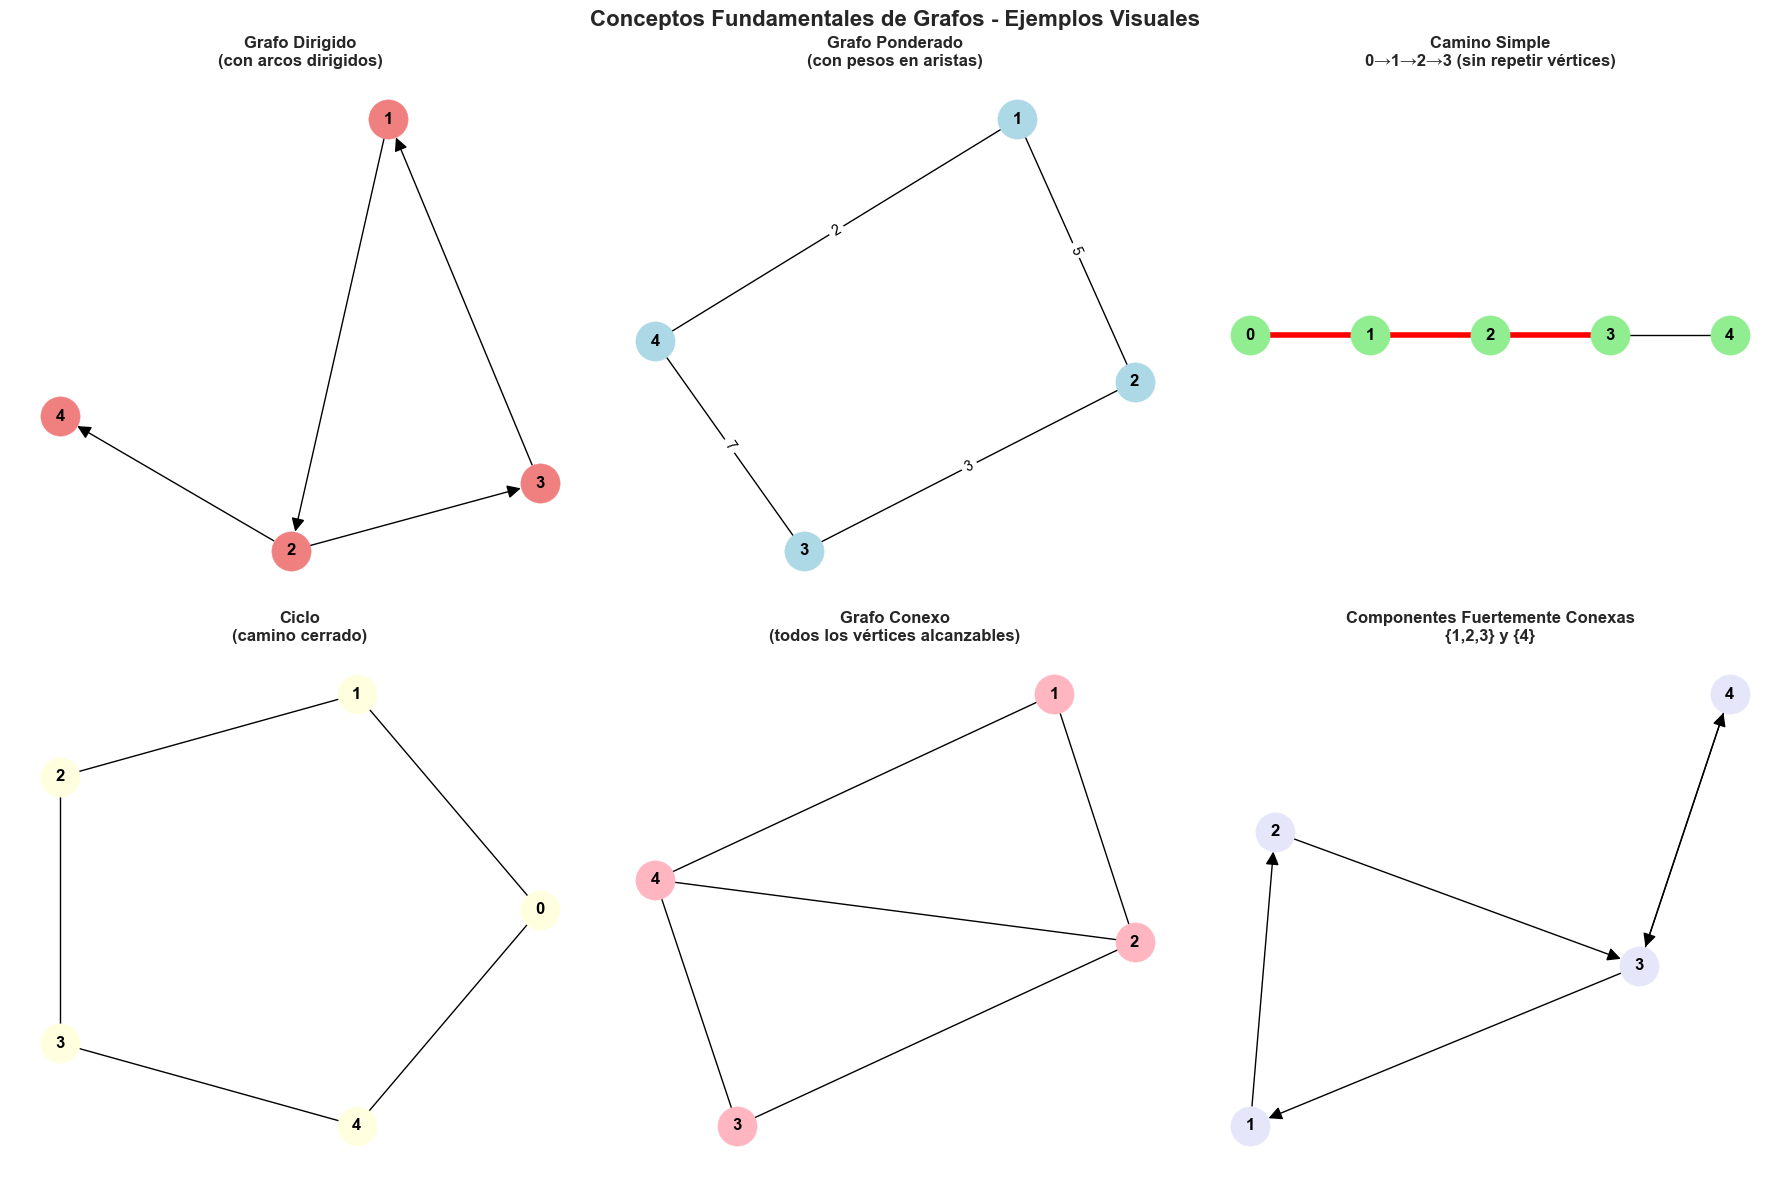

✅ Ejemplos visuales creados exitosamente!

📋 Observaciones importantes:
   🔸 Grafo dirigido: Las flechas indican dirección
   🔸 Grafo ponderado: Los números en aristas son pesos
   🔸 Camino simple: Resaltado en rojo, sin repetir vértices
   🔸 Ciclo: Forma un circuito cerrado
   🔸 Conexo: Existe camino entre cualquier par de vértices
   🔸 Fuertemente conexo: En grafos dirigidos, hay caminos bidireccionales


In [23]:
# Ejemplos visuales de los conceptos fundamentales
print("📚 Creando ejemplos visuales de conceptos fundamentales...\n")

# Crear ejemplos específicos para cada concepto
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Conceptos Fundamentales de Grafos - Ejemplos Visuales', fontsize=16, fontweight='bold')

# 1. Grafo Dirigido vs No Dirigido
ax1 = axes[0,0]
G_directed_example = nx.DiGraph()
G_directed_example.add_edges_from([(1, 2), (2, 3), (3, 1), (2, 4)])
pos_dir = nx.spring_layout(G_directed_example, seed=42)
nx.draw(G_directed_example, pos_dir, ax=ax1, with_labels=True, node_color='lightcoral',
        node_size=800, font_size=12, font_weight='bold', arrows=True, arrowsize=20)
ax1.set_title('Grafo Dirigido\n(con arcos dirigidos)', fontweight='bold')

# 2. Grafo Ponderado
ax2 = axes[0,1]
G_weighted_example = nx.Graph()
weighted_edges_ex = [(1, 2, 5), (2, 3, 3), (3, 4, 7), (1, 4, 2)]
G_weighted_example.add_weighted_edges_from(weighted_edges_ex)
pos_weight = nx.spring_layout(G_weighted_example, seed=42)
nx.draw(G_weighted_example, pos_weight, ax=ax2, with_labels=True, node_color='lightblue',
        node_size=800, font_size=12, font_weight='bold')
# Añadir etiquetas de peso
edge_labels = nx.get_edge_attributes(G_weighted_example, 'weight')
nx.draw_networkx_edge_labels(G_weighted_example, pos_weight, edge_labels, ax=ax2, font_size=10)
ax2.set_title('Grafo Ponderado\n(con pesos en aristas)', fontweight='bold')

# 3. Ejemplo de Camino vs Caminata
ax3 = axes[0,2]
G_path_example = nx.path_graph(5)
pos_path = {0: (0, 0), 1: (1, 0), 2: (2, 0), 3: (3, 0), 4: (4, 0)}
nx.draw(G_path_example, pos_path, ax=ax3, with_labels=True, node_color='lightgreen',
        node_size=800, font_size=12, font_weight='bold')
# Resaltar un camino específico
path_edges = [(0, 1), (1, 2), (2, 3)]
nx.draw_networkx_edges(G_path_example, pos_path, edgelist=path_edges, 
                      edge_color='red', width=4, ax=ax3)
ax3.set_title('Camino Simple\n0→1→2→3 (sin repetir vértices)', fontweight='bold')

# 4. Ejemplo de Ciclo
ax4 = axes[1,0]
G_cycle = nx.cycle_graph(5)
pos_cycle = nx.circular_layout(G_cycle)
nx.draw(G_cycle, pos_cycle, ax=ax4, with_labels=True, node_color='lightyellow',
        node_size=800, font_size=12, font_weight='bold')
ax4.set_title('Ciclo\n(camino cerrado)', fontweight='bold')

# 5. Grafo Conexo
ax5 = axes[1,1]
G_connected = nx.Graph()
G_connected.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])
pos_conn = nx.spring_layout(G_connected, seed=42)
nx.draw(G_connected, pos_conn, ax=ax5, with_labels=True, node_color='lightpink',
        node_size=800, font_size=12, font_weight='bold')
ax5.set_title('Grafo Conexo\n(todos los vértices alcanzables)', fontweight='bold')

# 6. Grafo Fuertemente Conexo
ax6 = axes[1,2]
G_strong = nx.DiGraph()
G_strong.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 3)])
pos_strong = nx.spring_layout(G_strong, seed=42)
nx.draw(G_strong, pos_strong, ax=ax6, with_labels=True, node_color='lavender',
        node_size=800, font_size=12, font_weight='bold', arrows=True, arrowsize=20)
ax6.set_title('Componentes Fuertemente Conexas\n{1,2,3} y {4}', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Ejemplos visuales creados exitosamente!")
print("\n📋 Observaciones importantes:")
print("   🔸 Grafo dirigido: Las flechas indican dirección")
print("   🔸 Grafo ponderado: Los números en aristas son pesos")
print("   🔸 Camino simple: Resaltado en rojo, sin repetir vértices")
print("   🔸 Ciclo: Forma un circuito cerrado")
print("   🔸 Conexo: Existe camino entre cualquier par de vértices")
print("   🔸 Fuertemente conexo: En grafos dirigidos, hay caminos bidireccionales")

In [24]:
# Demostración práctica de conceptos con análisis detallado
print("🔍 Análisis detallado de conceptos fundamentales...\n")

# Crear un grafo de ejemplo para analizar todos los conceptos
G_demo = nx.DiGraph()
G_demo.add_weighted_edges_from([
    (1, 2, 3), (2, 3, 2), (3, 4, 4), (4, 1, 1),
    (2, 4, 5), (3, 5, 3), (5, 4, 2)
])

print("🔹 ANÁLISIS DEL GRAFO DEMO:")
print(f"   Tipo: Grafo dirigido ponderado")
print(f"   Vértices: {list(G_demo.nodes())}")
print(f"   Aristas: {list(G_demo.edges(data=True))}")

print(f"\n🔹 ARCOS INCIDENTES:")
for node in G_demo.nodes():
    in_edges = list(G_demo.in_edges(node))
    out_edges = list(G_demo.out_edges(node))
    print(f"   Nodo {node}:")
    print(f"      Arcos entrantes: {in_edges}")
    print(f"      Arcos salientes: {out_edges}")

print(f"\n🔹 VÉRTICES ADYACENTES:")
for node in G_demo.nodes():
    predecessors = list(G_demo.predecessors(node))
    successors = list(G_demo.successors(node))
    print(f"   Nodo {node}:")
    print(f"      Predecesores: {predecessors}")
    print(f"      Sucesores: {successors}")

print(f"\n🔹 EJEMPLOS DE CAMINATAS Y RUTAS:")
# Encontrar algunos caminos
try:
    path_1_to_4 = nx.shortest_path(G_demo, 1, 4)
    path_cost = nx.shortest_path_length(G_demo, 1, 4, weight='weight')
    print(f"   Camino más corto de 1 a 4: {path_1_to_4}")
    print(f"   Costo del camino: {path_cost}")
    
    path_1_to_5 = nx.shortest_path(G_demo, 1, 5)
    path_cost_5 = nx.shortest_path_length(G_demo, 1, 5, weight='weight')
    print(f"   Camino más corto de 1 a 5: {path_1_to_5}")
    print(f"   Costo del camino: {path_cost_5}")
except nx.NetworkXNoPath as e:
    print(f"   No hay camino disponible: {e}")

print(f"\n🔹 DETECCIÓN DE CICLOS:")
cycles = list(nx.simple_cycles(G_demo))
print(f"   Ciclos encontrados: {cycles}")
if cycles:
    for i, cycle in enumerate(cycles, 1):
        cycle_cost = sum(G_demo[cycle[j]][cycle[(j+1) % len(cycle)]]['weight'] for j in range(len(cycle)))
        print(f"   Ciclo {i}: {cycle} → costo: {cycle_cost}")

print(f"\n🔹 ANÁLISIS DE CONECTIVIDAD:")
print(f"   ¿Es débilmente conexo?: {nx.is_weakly_connected(G_demo)}")
print(f"   ¿Es fuertemente conexo?: {nx.is_strongly_connected(G_demo)}")

# Componentes fuertemente conexas
scc = list(nx.strongly_connected_components(G_demo))
print(f"   Componentes fuertemente conexas: {scc}")

print(f"\n🔹 ANÁLISIS DE ACCESIBILIDAD:")
# Matriz de accesibilidad
print("   Matriz de accesibilidad (1=accesible, 0=no accesible):")
nodes = sorted(G_demo.nodes())
print("     ", end="")
for target in nodes:
    print(f"{target:3}", end="")
print()

for source in nodes:
    print(f"  {source}: ", end="")
    for target in nodes:
        if nx.has_path(G_demo, source, target):
            print(" 1 ", end="")
        else:
            print(" 0 ", end="")
    print()

print("\n✅ Análisis detallado completado!")

🔍 Análisis detallado de conceptos fundamentales...

🔹 ANÁLISIS DEL GRAFO DEMO:
   Tipo: Grafo dirigido ponderado
   Vértices: [1, 2, 3, 4, 5]
   Aristas: [(1, 2, {'weight': 3}), (2, 3, {'weight': 2}), (2, 4, {'weight': 5}), (3, 4, {'weight': 4}), (3, 5, {'weight': 3}), (4, 1, {'weight': 1}), (5, 4, {'weight': 2})]

🔹 ARCOS INCIDENTES:
   Nodo 1:
      Arcos entrantes: [(4, 1)]
      Arcos salientes: [(1, 2)]
   Nodo 2:
      Arcos entrantes: [(1, 2)]
      Arcos salientes: [(2, 3), (2, 4)]
   Nodo 3:
      Arcos entrantes: [(2, 3)]
      Arcos salientes: [(3, 4), (3, 5)]
   Nodo 4:
      Arcos entrantes: [(3, 4), (2, 4), (5, 4)]
      Arcos salientes: [(4, 1)]
   Nodo 5:
      Arcos entrantes: [(3, 5)]
      Arcos salientes: [(5, 4)]

🔹 VÉRTICES ADYACENTES:
   Nodo 1:
      Predecesores: [4]
      Sucesores: [2]
   Nodo 2:
      Predecesores: [1]
      Sucesores: [3, 4]
   Nodo 3:
      Predecesores: [2]
      Sucesores: [4, 5]
   Nodo 4:
      Predecesores: [3, 2, 5]
      Sucesores: 

### 📚 **Resumen de Conceptos Fundamentales**

| Concepto | Definición | Ejemplo |
|----------|------------|---------|
| **Grafo Dirigido** | Aristas con dirección específica | A → B (solo se puede ir de A a B) |
| **Arco Dirigido** | Arista dirigida entre dos vértices | (u, v) donde u es origen y v es destino |
| **Grafo Ponderado** | Aristas con pesos/costos asociados | Arista con peso 5: A —5— B |
| **Arco Incidente** | Arista conectada a un vértice | Arista (A,B) es incidente a A y a B |
| **Arco Adyacente** | Aristas que comparten un vértice | (A,B) y (B,C) son adyacentes en B |
| **Caminata** | Secuencia de vértices conectados | A→B→C→B→D (permite repetir) |
| **Caminata Dirigida** | Caminata respetando direcciones | En digrafos, seguir sentido de arcos |
| **Ruta/Camino** | Caminata sin repetir vértices | A→B→C→D (cada vértice una vez) |
| **Ciclo** | Camino cerrado (inicio = fin) | A→B→C→A |
| **Costo de Ruta** | Suma de pesos en un camino | Camino A→B→C: costo = w(A,B) + w(B,C) |
| **Conectividad** | Existencia de caminos entre vértices | Todos los vértices están conectados |
| **Accesibilidad** | Un vértice es alcanzable desde otro | Existe camino de u a v |
| **Grafo Conexo** | Hay camino entre cualquier par | Grafo en una sola "pieza" |
| **Grafo Fuertemente Conexo** | Caminos bidireccionales entre todos | Para todo u,v: hay camino u→v y v→u |

---

💡 **Nota Importante:** Estos conceptos son fundamentales para entender algoritmos avanzados como:
- Algoritmos de camino más corto (Dijkstra, Floyd-Warshall)
- Algoritmos de flujo máximo
- Detección de componentes conexas
- Análisis de redes sociales y sistemas complejos

# 📚 SECCIONES PRÁCTICAS: 14 Conceptos Fundamentales de Grafos

A continuación se presentan 14 secciones prácticas, cada una dedicada a un concepto específico con código, ejemplos y visualizaciones.

## 1. Arco Dirigido (Directed Edge/Arc)

Un **arco dirigido** es una arista que tiene una dirección específica, representando una conexión unidireccional entre dos vértices.

In [ ]:
# SECCIÓN 1: ARCO DIRIGIDO
print("🔹 SECCIÓN 1: ARCO DIRIGIDO")
print("="*50)

# Crear un grafo dirigido simple
G_arco = nx.DiGraph()

# Añadir arcos dirigidos
arcos_dirigidos = [(1, 2), (2, 3), (3, 4), (1, 4)]
G_arco.add_edges_from(arcos_dirigidos)

print("✓ Arcos dirigidos creados:")
for origen, destino in G_arco.edges():
    print(f"   {origen} → {destino}")

# Visualización
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_arco, seed=42)
nx.draw(G_arco, pos, with_labels=True, node_color='lightcoral', 
        node_size=1000, font_size=14, font_weight='bold', 
        arrows=True, arrowsize=20, arrowstyle='->', edge_color='red')

plt.title('Arcos Dirigidos - Cada flecha indica dirección', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print("\n📋 Características importantes:")
print("   • La dirección importa: (1→2) ≠ (2→1)")
print("   • Se representan con flechas")
print("   • Solo se puede 'viajar' en la dirección de la flecha")
print("   • Fundamental para modelar relaciones asimétricas")
print("✅ Sección 1 completada!\n")

## 2. Grafo Dirigido (Directed Graph/Digraph)

Un **grafo dirigido** es una estructura donde todas las aristas tienen dirección, creando relaciones asimétricas entre vértices.

In [ ]:
# SECCIÓN 2: GRAFO DIRIGIDO
print("🔹 SECCIÓN 2: GRAFO DIRIGIDO")
print("="*50)

# Crear un grafo dirigido complejo
G_dirigido = nx.DiGraph()

# Añadir nodos y aristas dirigidas
nodos = [1, 2, 3, 4, 5]
aristas_dirigidas = [(1, 2), (2, 3), (3, 1), (2, 4), (4, 5), (5, 2), (3, 4)]
G_dirigido.add_nodes_from(nodos)
G_dirigido.add_edges_from(aristas_dirigidas)

print("✓ Propiedades del grafo dirigido:")
print(f"   Número de nodos: {G_dirigido.number_of_nodes()}")
print(f"   Número de aristas: {G_dirigido.number_of_edges()}")
print(f"   Es dirigido: {G_dirigido.is_directed()}")

# Analizar grados de entrada y salida
print("\n✓ Grados de entrada y salida:")
for nodo in G_dirigido.nodes():
    grado_entrada = G_dirigido.in_degree(nodo)
    grado_salida = G_dirigido.out_degree(nodo)
    print(f"   Nodo {nodo}: Entrada={grado_entrada}, Salida={grado_salida}")

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Grafo dirigido
pos1 = nx.spring_layout(G_dirigido, seed=42)
nx.draw(G_dirigido, pos1, ax=ax1, with_labels=True, node_color='lightblue',
        node_size=1000, font_size=12, font_weight='bold',
        arrows=True, arrowsize=20, edge_color='blue')
ax1.set_title('Grafo Dirigido', fontweight='bold')

# Mismo grafo pero no dirigido para comparación
G_no_dirigido = G_dirigido.to_undirected()
nx.draw(G_no_dirigido, pos1, ax=ax2, with_labels=True, node_color='lightgreen',
        node_size=1000, font_size=12, font_weight='bold', edge_color='green')
ax2.set_title('Mismo Grafo pero No Dirigido', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📋 Diferencias clave:")
print("   • Dirigido: Las aristas tienen dirección específica")
print("   • No dirigido: Las aristas son bidireccionales")
print("   • En dirigidos: grado = grado_entrada + grado_salida")
print("   • Aplicaciones: Redes sociales, flujo de datos, dependencias")
print("✅ Sección 2 completada!\n")

## 3. Grafo Ponderado (Weighted Graph)

Un **grafo ponderado** tiene pesos (valores numéricos) asociados a sus aristas, representando costos, distancias, capacidades, etc.

In [ ]:
# SECCIÓN 3: GRAFO PONDERADO
print("🔹 SECCIÓN 3: GRAFO PONDERADO")
print("="*50)

# Crear un grafo ponderado
G_ponderado = nx.Graph()

# Añadir aristas con pesos (representando distancias entre ciudades)
aristas_ponderadas = [
    ('Madrid', 'Barcelona', 621),
    ('Madrid', 'Sevilla', 532),
    ('Barcelona', 'Valencia', 349),
    ('Valencia', 'Sevilla', 632),
    ('Madrid', 'Valencia', 352),
    ('Barcelona', 'Sevilla', 829)
]

G_ponderado.add_weighted_edges_from(aristas_ponderadas)

print("✓ Aristas con pesos (distancias en km):")
for origen, destino, datos in G_ponderado.edges(data=True):
    peso = datos['weight']
    print(f"   {origen} ↔ {destino}: {peso} km")

# Análisis de pesos
pesos = [datos['weight'] for _, _, datos in G_ponderado.edges(data=True)]
print(f"\n✓ Estadísticas de pesos:")
print(f"   Peso mínimo: {min(pesos)} km")
print(f"   Peso máximo: {max(pesos)} km")
print(f"   Peso promedio: {sum(pesos)/len(pesos):.1f} km")

# Visualización
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_ponderado, seed=42, k=3)

# Dibujar nodos y aristas
nx.draw_networkx_nodes(G_ponderado, pos, node_color='lightblue', 
                      node_size=2000, alpha=0.9)
nx.draw_networkx_labels(G_ponderado, pos, font_size=10, font_weight='bold')

# Dibujar aristas con grosor proporcional al peso
pesos_norm = [peso/100 for peso in pesos]  # Normalizar para visualización
nx.draw_networkx_edges(G_ponderado, pos, width=pesos_norm, 
                      edge_color='gray', alpha=0.7)

# Añadir etiquetas de peso
edge_labels = nx.get_edge_attributes(G_ponderado, 'weight')
edge_labels = {k: f"{v} km" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G_ponderado, pos, edge_labels, font_size=9)

plt.title('Grafo Ponderado - Red de Ciudades con Distancias', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print("\n📋 Aplicaciones de grafos ponderados:")
print("   • Redes de transporte (distancias, tiempos)")
print("   • Redes de comunicación (ancho de banda, latencia)")
print("   • Análisis de costos (precios, recursos)")
print("   • Algoritmos de optimización (camino más corto)")
print("✅ Sección 3 completada!\n")

## 4. Arco Incidente (Incident Edge)

Un **arco incidente** a un vértice es cualquier arista que tiene ese vértice como uno de sus extremos.

In [ ]:
# SECCIÓN 4: ARCO INCIDENTE
print("🔹 SECCIÓN 4: ARCO INCIDENTE")
print("="*50)

# Crear un grafo mixto (dirigido) para mostrar incidencia
G_incidente = nx.DiGraph()
aristas = [(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 1)]
G_incidente.add_edges_from(aristas)

print("✓ Análisis de arcos incidentes por vértice:")
for nodo in G_incidente.nodes():
    # Arcos incidentes salientes
    arcos_salientes = list(G_incidente.out_edges(nodo))
    # Arcos incidentes entrantes  
    arcos_entrantes = list(G_incidente.in_edges(nodo))
    
    print(f"\n   Vértice {nodo}:")
    print(f"   • Arcos incidentes salientes: {arcos_salientes}")
    print(f"   • Arcos incidentes entrantes: {arcos_entrantes}")
    print(f"   • Total de arcos incidentes: {len(arcos_salientes) + len(arcos_entrantes)}")

# Visualización enfocándose en un nodo específico
nodo_objetivo = 1
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_incidente, seed=42)

# Dibujar todos los nodos
nx.draw_networkx_nodes(G_incidente, pos, node_color='lightgray', 
                      node_size=1000, alpha=0.7)

# Resaltar el nodo objetivo
nx.draw_networkx_nodes(G_incidente, pos, nodelist=[nodo_objetivo], 
                      node_color='red', node_size=1500)

# Dibujar todas las aristas en gris claro
nx.draw_networkx_edges(G_incidente, pos, edge_color='lightgray', 
                      arrows=True, arrowsize=15, alpha=0.5)

# Resaltar arcos incidentes al nodo objetivo
arcos_salientes = list(G_incidente.out_edges(nodo_objetivo))
arcos_entrantes = list(G_incidente.in_edges(nodo_objetivo))

# Arcos salientes en azul
nx.draw_networkx_edges(G_incidente, pos, edgelist=arcos_salientes,
                      edge_color='blue', arrows=True, arrowsize=20, width=3)

# Arcos entrantes en verde
nx.draw_networkx_edges(G_incidente, pos, edgelist=arcos_entrantes,
                      edge_color='green', arrows=True, arrowsize=20, width=3)

nx.draw_networkx_labels(G_incidente, pos, font_size=12, font_weight='bold')

plt.title(f'Arcos Incidentes al Vértice {nodo_objetivo}\n' +
          'Azul: Salientes, Verde: Entrantes', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print(f"\n📋 Definición:")
print(f"   • Un arco es incidente a un vértice si ese vértice es uno de sus extremos")
print(f"   • En grafos dirigidos: distinguimos entre incidentes entrantes y salientes")
print(f"   • El grado de un vértice = número de arcos incidentes")
print("✅ Sección 4 completada!\n")

## 5. Arco Adyacente (Adjacent Edges)

**Arcos adyacentes** son dos aristas que comparten al menos un vértice común.

In [ ]:
# SECCIÓN 5: ARCO ADYACENTE
print("🔹 SECCIÓN 5: ARCO ADYACENTE")
print("="*50)

# Crear un grafo simple para demostrar adyacencia
G_adyacente = nx.Graph()
aristas_adj = [(1, 2), (2, 3), (3, 4), (2, 5), (4, 6)]
G_adyacente.add_edges_from(aristas_adj)

print("✓ Aristas del grafo:")
for i, (u, v) in enumerate(G_adyacente.edges(), 1):
    print(f"   Arista {i}: ({u}, {v})")

# Función para encontrar aristas adyacentes
def encontrar_aristas_adyacentes(grafo, arista_objetivo):
    u, v = arista_objetivo
    adyacentes = []
    
    # Buscar todas las aristas que comparten un vértice con la arista objetivo
    for arista in grafo.edges():
        a, b = arista
        if arista != arista_objetivo:  # No contar la misma arista
            if u in (a, b) or v in (a, b):  # Comparten al menos un vértice
                adyacentes.append(arista)
    
    return adyacentes

# Analizar adyacencia para cada arista
print(f"\n✓ Análisis de aristas adyacentes:")
for arista in G_adyacente.edges():
    adyacentes = encontrar_aristas_adyacentes(G_adyacente, arista)
    print(f"   Arista {arista} es adyacente a: {adyacentes}")

# Visualización destacando una arista específica y sus adyacentes
arista_objetivo = (2, 3)
adyacentes_objetivo = encontrar_aristas_adyacentes(G_adyacente, arista_objetivo)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_adyacente, seed=42)

# Dibujar todos los nodos
nx.draw_networkx_nodes(G_adyacente, pos, node_color='lightblue', 
                      node_size=1000)

# Dibujar todas las aristas en gris claro
nx.draw_networkx_edges(G_adyacente, pos, edge_color='lightgray', width=2)

# Destacar la arista objetivo en rojo
nx.draw_networkx_edges(G_adyacente, pos, edgelist=[arista_objetivo],
                      edge_color='red', width=5)

# Destacar las aristas adyacentes en azul
nx.draw_networkx_edges(G_adyacente, pos, edgelist=adyacentes_objetivo,
                      edge_color='blue', width=3)

nx.draw_networkx_labels(G_adyacente, pos, font_size=12, font_weight='bold')

plt.title(f'Arista Objetivo {arista_objetivo} (Rojo) y sus Adyacentes (Azul)', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print(f"\n📋 Concepto clave:")
print(f"   • Dos aristas son adyacentes si comparten al menos un vértice")
print(f"   • Útil para algoritmos de recorrido y coloración de aristas")
print(f"   • No confundir con vértices adyacentes (conectados por una arista)")
print("✅ Sección 5 completada!\n")

## 6. Caminata (Walk)

Una **caminata** es una secuencia de vértices donde cada par consecutivo está conectado por una arista. Permite repetir vértices y aristas.

In [ ]:
# SECCIÓN 6: CAMINATA (WALK)
print("🔹 SECCIÓN 6: CAMINATA (WALK)")
print("="*50)

# Crear un grafo para demostrar caminatas
G_caminata = nx.Graph()
aristas_cam = [(1, 2), (2, 3), (3, 4), (4, 2), (2, 5), (5, 6), (6, 1)]
G_caminata.add_edges_from(aristas_cam)

print("✓ Grafo para caminatas:")
print(f"   Nodos: {list(G_caminata.nodes())}")
print(f"   Aristas: {list(G_caminata.edges())}")

# Ejemplos de diferentes caminatas
caminatas_ejemplo = [
    [1, 2, 3, 4, 2, 5],  # Repite vértice 2
    [1, 6, 5, 2, 4, 3],  # Caminata simple
    [2, 3, 4, 2, 3, 4, 2],  # Repite múltiples vértices
    [1, 2, 3, 2, 1, 6, 1]  # Caminata con muchas repeticiones
]

print(f"\n✓ Ejemplos de caminatas:")
for i, caminata in enumerate(caminatas_ejemplo, 1):
    # Verificar si la caminata es válida
    valida = True
    for j in range(len(caminata) - 1):
        if not G_caminata.has_edge(caminata[j], caminata[j+1]):
            valida = False
            break
    
    longitud = len(caminata) - 1  # Número de aristas
    vertices_unicos = len(set(caminata))
    repeticiones = len(caminata) - vertices_unicos
    
    print(f"   Caminata {i}: {' → '.join(map(str, caminata))}")
    print(f"     • Válida: {'Sí' if valida else 'No'}")
    print(f"     • Longitud: {longitud} aristas")
    print(f"     • Vértices únicos: {vertices_unicos}")
    print(f"     • Repeticiones: {repeticiones}")
    print()

# Visualización de una caminata específica
caminata_demo = caminatas_ejemplo[0]  # [1, 2, 3, 4, 2, 5]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_caminata, seed=42)

# Dibujar el grafo base
nx.draw_networkx_nodes(G_caminata, pos, node_color='lightblue', 
                      node_size=1000, alpha=0.7)
nx.draw_networkx_edges(G_caminata, pos, edge_color='lightgray', width=2)
nx.draw_networkx_labels(G_caminata, pos, font_size=12, font_weight='bold')

# Resaltar la caminata paso a paso
colores = ['red', 'orange', 'yellow', 'green', 'blue']
for i in range(len(caminata_demo) - 1):
    inicio = caminata_demo[i]
    fin = caminata_demo[i + 1]
    
    # Dibujar arista con color específico y grosor
    nx.draw_networkx_edges(G_caminata, pos, edgelist=[(inicio, fin)],
                          edge_color=colores[i % len(colores)], 
                          width=4 + i, alpha=0.8)
    
    # Añadir número de paso
    x1, y1 = pos[inicio]
    x2, y2 = pos[fin]
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    plt.text(mid_x, mid_y, str(i+1), fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='circle', facecolor='white', alpha=0.8))

plt.title(f'Caminata: {" → ".join(map(str, caminata_demo))}\n' +
          'Colores y números muestran el orden de recorrido', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print(f"📋 Características de las caminatas:")
print(f"   • Permiten repetir vértices y aristas")
print(f"   • Solo requieren que vértices consecutivos estén conectados")
print(f"   • Base para definir caminos, rutas y ciclos")
print(f"   • Útiles para modelar recorridos realistas")
print("✅ Sección 6 completada!\n")

## 7. Caminata Dirigida (Directed Walk)

Una **caminata dirigida** es una caminata en un grafo dirigido donde se debe respetar la dirección de las aristas.

In [ ]:
# SECCIÓN 7: CAMINATA DIRIGIDA
print("🔹 SECCIÓN 7: CAMINATA DIRIGIDA")
print("="*50)

# Crear un grafo dirigido para caminatas dirigidas
G_dirigida = nx.DiGraph()
aristas_dir = [(1, 2), (2, 3), (3, 1), (2, 4), (4, 5), (5, 2), (3, 4)]
G_dirigida.add_edges_from(aristas_dir)

print("✓ Grafo dirigido para caminatas:")
print(f"   Aristas dirigidas: {list(G_dirigida.edges())}")

# Función para verificar si una caminata dirigida es válida
def verificar_caminata_dirigida(grafo, caminata):
    for i in range(len(caminata) - 1):
        if not grafo.has_edge(caminata[i], caminata[i+1]):
            return False, f"No existe arco {caminata[i]} → {caminata[i+1]}"
    return True, "Caminata válida"

# Ejemplos de caminatas dirigidas
caminatas_dirigidas = [
    [1, 2, 3, 1, 2, 4, 5, 2],  # Válida
    [1, 2, 4, 3],  # Inválida (no existe 4→3)
    [2, 3, 4, 5, 2, 3, 1],  # Válida
    [5, 4, 2, 1],  # Inválida (no existe 5→4)
    [3, 1, 2, 4, 5]  # Válida
]

print(f"\n✓ Análisis de caminatas dirigidas:")
for i, caminata in enumerate(caminatas_dirigidas, 1):
    valida, mensaje = verificar_caminata_dirigida(G_dirigida, caminata)
    longitud = len(caminata) - 1
    
    print(f"   Caminata {i}: {' → '.join(map(str, caminata))}")
    print(f"     • {mensaje}")
    print(f"     • Longitud: {longitud} arcos")
    if not valida:
        print(f"     • Error: {mensaje}")
    print()

# Visualización comparativa: caminata válida vs inválida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
pos = nx.spring_layout(G_dirigida, seed=42)

# Caminata válida
caminata_valida = caminatas_dirigidas[0]  # [1, 2, 3, 1, 2, 4, 5, 2]
ax1.set_title('Caminata Dirigida VÁLIDA\n' + ' → '.join(map(str, caminata_valida)), 
              fontweight='bold', color='green')

# Dibujar grafo base
nx.draw_networkx_nodes(G_dirigida, pos, ax=ax1, node_color='lightblue', node_size=800)
nx.draw_networkx_edges(G_dirigida, pos, ax=ax1, edge_color='lightgray', 
                      arrows=True, arrowsize=15, alpha=0.5)
nx.draw_networkx_labels(G_dirigida, pos, ax=ax1, font_size=10, font_weight='bold')

# Resaltar caminata válida
for i in range(len(caminata_valida) - 1):
    inicio = caminata_valida[i]
    fin = caminata_valida[i + 1]
    nx.draw_networkx_edges(G_dirigida, pos, ax=ax1, edgelist=[(inicio, fin)],
                          edge_color='green', width=3, arrows=True, arrowsize=20)

# Caminata inválida
caminata_invalida = caminatas_dirigidas[1]  # [1, 2, 4, 3]
ax2.set_title('Caminata Dirigida INVÁLIDA\n' + ' → '.join(map(str, caminata_invalida)), 
              fontweight='bold', color='red')

# Dibujar grafo base
nx.draw_networkx_nodes(G_dirigida, pos, ax=ax2, node_color='lightblue', node_size=800)
nx.draw_networkx_edges(G_dirigida, pos, ax=ax2, edge_color='lightgray', 
                      arrows=True, arrowsize=15, alpha=0.5)
nx.draw_networkx_labels(G_dirigida, pos, ax=ax2, font_size=10, font_weight='bold')

# Resaltar parte válida en verde y parte inválida en rojo
for i in range(len(caminata_invalida) - 1):
    inicio = caminata_invalida[i]
    fin = caminata_invalida[i + 1]
    
    if G_dirigida.has_edge(inicio, fin):
        color = 'green'
        alpha = 1.0
    else:
        color = 'red'
        alpha = 0.8
        # Dibujar línea punteada para arco inexistente
        x1, y1 = pos[inicio]
        x2, y2 = pos[fin]
        ax2.plot([x1, x2], [y1, y2], 'r--', linewidth=3, alpha=0.8)
        ax2.annotate('NO EXISTE', xy=((x1+x2)/2, (y1+y2)/2), 
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, color='red', fontweight='bold')
        continue
    
    nx.draw_networkx_edges(G_dirigida, pos, ax=ax2, edgelist=[(inicio, fin)],
                          edge_color=color, width=3, arrows=True, arrowsize=20, alpha=alpha)

plt.tight_layout()
plt.show()

print(f"📋 Reglas de caminatas dirigidas:")
print(f"   • Debe seguir la dirección de los arcos")
print(f"   • Si existe A→B, NO implica que existe B→A")
print(f"   • Fundamentales para algoritmos en grafos dirigidos")
print(f"   • Aplicaciones: flujo de control, dependencias, procesos")
print("✅ Sección 7 completada!\n")

## 8. Ruta (Path)

Una **ruta** o **camino simple** es una caminata donde todos los vértices son distintos (no hay repeticiones).

In [ ]:
# SECCIÓN 8: RUTA (PATH)
print("🔹 SECCIÓN 8: RUTA (PATH)")
print("="*50)

# Crear un grafo para demostrar rutas
G_ruta = nx.Graph()
aristas_ruta = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (2, 7), (3, 8), (6, 8)]
G_ruta.add_edges_from(aristas_ruta)

print("✓ Grafo para análisis de rutas:")
print(f"   Nodos: {sorted(G_ruta.nodes())}")

# Función para verificar si una secuencia es una ruta válida
def es_ruta_valida(grafo, secuencia):
    # Verificar que no hay vértices repetidos
    if len(secuencia) != len(set(secuencia)):
        return False, "Hay vértices repetidos"
    
    # Verificar que existe conexión entre vértices consecutivos
    for i in range(len(secuencia) - 1):
        if not grafo.has_edge(secuencia[i], secuencia[i+1]):
            return False, f"No existe conexión entre {secuencia[i]} y {secuencia[i+1]}"
    
    return True, "Ruta válida"

# Ejemplos de secuencias: rutas vs caminatas
ejemplos = [
    [1, 2, 3, 4, 5, 6],  # Ruta válida
    [1, 2, 7],  # Ruta válida corta
    [1, 2, 3, 2, 4],  # No es ruta (repite vértice 2)
    [1, 2, 3, 8, 6, 5],  # Ruta válida
    [1, 3, 4, 5],  # No es ruta (no existe 1-3)
    [2, 3, 8, 6]  # Ruta válida
]

print(f"\n✓ Análisis de secuencias:")
rutas_validas = []
for i, secuencia in enumerate(ejemplos, 1):
    valida, mensaje = es_ruta_valida(G_ruta, secuencia)
    longitud = len(secuencia) - 1
    
    print(f"   Secuencia {i}: {' → '.join(map(str, secuencia))}")
    print(f"     • {mensaje}")
    print(f"     • Longitud: {longitud}")
    print(f"     • Es ruta: {'Sí' if valida else 'No'}")
    
    if valida:
        rutas_validas.append(secuencia)
    print()

# Encontrar todas las rutas simples entre dos nodos usando NetworkX
nodo_inicio = 1
nodo_fin = 6
rutas_simples = list(nx.all_simple_paths(G_ruta, nodo_inicio, nodo_fin))

print(f"✓ Todas las rutas simples de {nodo_inicio} a {nodo_fin}:")
for i, ruta in enumerate(rutas_simples, 1):
    print(f"   Ruta {i}: {' → '.join(map(str, ruta))} (longitud: {len(ruta)-1})")

# Visualización de rutas
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Grafo completo con todas las rutas posibles
pos = nx.spring_layout(G_ruta, seed=42)

ax1.set_title('Grafo Completo', fontweight='bold')
nx.draw(G_ruta, pos, ax=ax1, with_labels=True, node_color='lightblue',
        node_size=800, font_size=12, font_weight='bold', edge_color='gray')

# Destacar nodos de inicio y fin
nx.draw_networkx_nodes(G_ruta, pos, ax=ax1, nodelist=[nodo_inicio], 
                      node_color='green', node_size=1000)
nx.draw_networkx_nodes(G_ruta, pos, ax=ax1, nodelist=[nodo_fin], 
                      node_color='red', node_size=1000)

# Visualizar la ruta más corta
ax2.set_title(f'Ruta Más Corta: {nodo_inicio} → {nodo_fin}', fontweight='bold')
nx.draw(G_ruta, pos, ax=ax2, with_labels=True, node_color='lightgray',
        node_size=800, font_size=12, font_weight='bold', 
        edge_color='lightgray', alpha=0.5)

if rutas_simples:
    ruta_corta = min(rutas_simples, key=len)
    
    # Destacar la ruta más corta
    for i in range(len(ruta_corta) - 1):
        nx.draw_networkx_edges(G_ruta, pos, ax=ax2, 
                              edgelist=[(ruta_corta[i], ruta_corta[i+1])],
                              edge_color='blue', width=4)
    
    # Destacar nodos de la ruta
    nx.draw_networkx_nodes(G_ruta, pos, ax=ax2, nodelist=ruta_corta,
                          node_color='lightblue', node_size=1000)
    nx.draw_networkx_nodes(G_ruta, pos, ax=ax2, nodelist=[nodo_inicio], 
                          node_color='green', node_size=1200)
    nx.draw_networkx_nodes(G_ruta, pos, ax=ax2, nodelist=[nodo_fin], 
                          node_color='red', node_size=1200)

plt.tight_layout()
plt.show()

print(f"\n📋 Características de las rutas:")
print(f"   • No repiten vértices (camino simple)")
print(f"   • Representan el recorrido más directo entre puntos")
print(f"   • Base para algoritmos de camino más corto")
print(f"   • Longitud = número de aristas en la ruta")
print("✅ Sección 8 completada!\n")

## 9. Ciclo (Cycle)

Un **ciclo** es una caminata cerrada donde el vértice inicial y final son el mismo, y no repite vértices intermedios.

In [ ]:
# SECCIÓN 9: CICLO (CYCLE)
print("🔹 SECCIÓN 9: CICLO (CYCLE)")
print("="*50)

# Crear un grafo con varios ciclos
G_ciclo = nx.Graph()
aristas_ciclo = [(1, 2), (2, 3), (3, 4), (4, 1),  # Ciclo 1-2-3-4-1
                 (3, 5), (5, 6), (6, 3),  # Ciclo 3-5-6-3
                 (4, 7), (7, 8), (8, 4)]  # Ciclo 4-7-8-4
G_ciclo.add_edges_from(aristas_ciclo)

print("✓ Detección de ciclos en el grafo:")

# Encontrar una base de ciclos
try:
    ciclos_base = nx.cycle_basis(G_ciclo)
    print(f"   Número de ciclos básicos: {len(ciclos_base)}")
    for i, ciclo in enumerate(ciclos_base, 1):
        ciclo_cerrado = ciclo + [ciclo[0]]  # Cerrar el ciclo para visualización
        print(f"   Ciclo {i}: {' → '.join(map(str, ciclo_cerrado))} (longitud: {len(ciclo)})")
except:
    print("   No se encontraron ciclos o es un árbol")

# Función para verificar si una secuencia forma un ciclo
def es_ciclo_valido(grafo, secuencia):
    if len(secuencia) < 4:  # Mínimo: inicio + 2 intermedios + retorno
        return False, "Muy corto para ser un ciclo"
    
    if secuencia[0] != secuencia[-1]:
        return False, "No es cerrado (inicio ≠ fin)"
    
    # Verificar que no hay repeticiones en vértices intermedios
    vertices_intermedios = secuencia[1:-1]
    if len(vertices_intermedios) != len(set(vertices_intermedios)):
        return False, "Repite vértices intermedios"
    
    # Verificar conexiones
    for i in range(len(secuencia) - 1):
        if not grafo.has_edge(secuencia[i], secuencia[i+1]):
            return False, f"No existe conexión {secuencia[i]}-{secuencia[i+1]}"
    
    return True, "Ciclo válido"

# Ejemplos de secuencias para verificar
ejemplos_ciclos = [
    [1, 2, 3, 4, 1],  # Ciclo válido
    [3, 5, 6, 3],  # Ciclo válido
    [1, 2, 3, 1],  # Ciclo válido corto
    [4, 7, 8, 4],  # Ciclo válido
    [1, 2, 3, 4, 7, 1],  # No es ciclo (no existe 7-1)
    [2, 3, 5, 2]  # No es ciclo (no existe 5-2)
]

print(f"\n✓ Verificación de ciclos:")
ciclos_validos = []
for i, secuencia in enumerate(ejemplos_ciclos, 1):
    valido, mensaje = es_ciclo_valido(G_ciclo, secuencia)
    longitud = len(secuencia) - 1 if valido else len(secuencia)
    
    print(f"   Secuencia {i}: {' → '.join(map(str, secuencia))}")
    print(f"     • {mensaje}")
    print(f"     • Longitud: {longitud}")
    
    if valido:
        ciclos_validos.append(secuencia)
    print()

# Visualización de ciclos
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_ciclo, seed=42)

# Dibujar grafo base
nx.draw_networkx_nodes(G_ciclo, pos, node_color='lightgray', 
                      node_size=1000, alpha=0.7)
nx.draw_networkx_edges(G_ciclo, pos, edge_color='lightgray', width=2)
nx.draw_networkx_labels(G_ciclo, pos, font_size=12, font_weight='bold')

# Destacar cada ciclo con un color diferente
colores_ciclos = ['red', 'blue', 'green', 'orange', 'purple']
for i, ciclo in enumerate(ciclos_base):
    color = colores_ciclos[i % len(colores_ciclos)]
    
    # Crear lista de aristas del ciclo
    aristas_ciclo = []
    for j in range(len(ciclo)):
        aristas_ciclo.append((ciclo[j], ciclo[(j+1) % len(ciclo)]))
    
    # Dibujar aristas del ciclo
    nx.draw_networkx_edges(G_ciclo, pos, edgelist=aristas_ciclo,
                          edge_color=color, width=4, alpha=0.8)
    
    # Destacar nodos del ciclo
    nx.draw_networkx_nodes(G_ciclo, pos, nodelist=ciclo,
                          node_color=color, node_size=1200, alpha=0.6)

plt.title('Ciclos en el Grafo\n(Cada color representa un ciclo diferente)', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

# Análisis adicional
print(f"✓ Propiedades del grafo relacionadas con ciclos:")
print(f"   • Número de ciclos básicos: {len(ciclos_base)}")
print(f"   • Es acíclico (árbol): {nx.is_tree(G_ciclo)}")
print(f"   • Es bipartito (sin ciclos impares): {nx.is_bipartite(G_ciclo)}")

if ciclos_base:
    longitudes = [len(ciclo) for ciclo in ciclos_base]
    print(f"   • Longitud de ciclos: {longitudes}")
    print(f"   • Ciclo más corto: {min(longitudes)}")
    print(f"   • Ciclo más largo: {max(longitudes)}")

print(f"\n📋 Características de los ciclos:")
print(f"   • Caminata cerrada: inicio = fin")
print(f"   • No repite vértices intermedios")
print(f"   • Longitud mínima: 3 (en grafos simples)")
print(f"   • Fundamentales para detectar dependencias circulares")
print("✅ Sección 9 completada!\n")

## 10. Costo de Ruta (Path Cost)

El **costo de ruta** en un grafo ponderado es la suma de los pesos de todas las aristas en un camino.

In [ ]:
# SECCIÓN 10: COSTO DE RUTA
print("🔹 SECCIÓN 10: COSTO DE RUTA")
print("="*50)

# Crear un grafo ponderado para calcular costos
G_costo = nx.Graph()
aristas_costo = [
    ('A', 'B', 4), ('A', 'C', 2), ('B', 'C', 1), ('B', 'D', 5),
    ('C', 'D', 8), ('C', 'E', 10), ('D', 'E', 2), ('D', 'F', 6), ('E', 'F', 3)
]
G_costo.add_weighted_edges_from(aristas_costo)

print("✓ Grafo ponderado para análisis de costos:")
for u, v, peso in G_costo.edges(data='weight'):
    print(f"   {u} ↔ {v}: costo {peso}")

# Función para calcular el costo de una ruta específica
def calcular_costo_ruta(grafo, ruta):
    if len(ruta) < 2:
        return 0, "Ruta muy corta"
    
    costo_total = 0
    detalles = []
    
    for i in range(len(ruta) - 1):
        nodo_actual = ruta[i]
        nodo_siguiente = ruta[i + 1]
        
        if grafo.has_edge(nodo_actual, nodo_siguiente):
            peso = grafo[nodo_actual][nodo_siguiente]['weight']
            costo_total += peso
            detalles.append(f"{nodo_actual}→{nodo_siguiente}: {peso}")
        else:
            return None, f"No existe conexión entre {nodo_actual} y {nodo_siguiente}"
    
    return costo_total, detalles

# Ejemplos de rutas para calcular costos
rutas_ejemplo = [
    ['A', 'B', 'D', 'F'],      # Ruta directa
    ['A', 'C', 'B', 'D', 'E', 'F'],  # Ruta más larga
    ['A', 'C', 'E', 'F'],      # Ruta alternativa
    ['A', 'B', 'C', 'D'],      # Otra ruta
    ['A', 'C', 'D', 'E']       # Ruta parcial
]

print(f"\n✓ Cálculo de costos para diferentes rutas:")
costos_calculados = []
for i, ruta in enumerate(rutas_ejemplo, 1):
    costo, detalles = calcular_costo_ruta(G_costo, ruta)
    
    print(f"   Ruta {i}: {' → '.join(ruta)}")
    if costo is not None:
        print(f"     • Costo total: {costo}")
        print(f"     • Desglose: {' + '.join(detalles)}")
        costos_calculados.append((ruta, costo))
    else:
        print(f"     • Error: {detalles}")
    print()

# Encontrar la ruta de menor costo entre dos nodos
origen = 'A'
destino = 'F'

try:
    # Ruta más corta por distancia (número de aristas)
    ruta_corta_dist = nx.shortest_path(G_costo, origen, destino)
    costo_corta_dist, _ = calcular_costo_ruta(G_costo, ruta_corta_dist)
    
    # Ruta más corta por peso (menor costo)
    ruta_corta_peso = nx.shortest_path(G_costo, origen, destino, weight='weight')
    costo_corta_peso = nx.shortest_path_length(G_costo, origen, destino, weight='weight')
    
    print(f"✓ Comparación de rutas óptimas de {origen} a {destino}:")
    print(f"   • Ruta más corta (distancia): {' → '.join(ruta_corta_dist)}")
    print(f"     Longitud: {len(ruta_corta_dist)-1} aristas, Costo: {costo_corta_dist}")
    print(f"   • Ruta más corta (costo): {' → '.join(ruta_corta_peso)}")
    print(f"     Longitud: {len(ruta_corta_peso)-1} aristas, Costo: {costo_corta_peso}")
    
except nx.NetworkXNoPath:
    print(f"   No hay ruta entre {origen} y {destino}")

# Visualización de rutas con costos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
pos = nx.spring_layout(G_costo, seed=42)

# Grafo completo con pesos
ax1.set_title('Grafo Completo con Pesos', fontweight='bold')
nx.draw(G_costo, pos, ax=ax1, with_labels=True, node_color='lightblue',
        node_size=1000, font_size=12, font_weight='bold')

# Añadir etiquetas de peso
edge_labels = nx.get_edge_attributes(G_costo, 'weight')
nx.draw_networkx_edge_labels(G_costo, pos, edge_labels, ax=ax1, font_size=10)

# Destacar origen y destino
nx.draw_networkx_nodes(G_costo, pos, ax=ax1, nodelist=[origen], 
                      node_color='green', node_size=1200)
nx.draw_networkx_nodes(G_costo, pos, ax=ax1, nodelist=[destino], 
                      node_color='red', node_size=1200)

# Ruta de menor costo
ax2.set_title(f'Ruta de Menor Costo: {origen} → {destino}\nCosto: {costo_corta_peso}', 
              fontweight='bold')
nx.draw(G_costo, pos, ax=ax2, with_labels=True, node_color='lightgray',
        node_size=1000, font_size=12, font_weight='bold', 
        edge_color='lightgray', alpha=0.5)

# Destacar la ruta óptima
ruta_edges = [(ruta_corta_peso[i], ruta_corta_peso[i+1]) 
              for i in range(len(ruta_corta_peso)-1)]
nx.draw_networkx_edges(G_costo, pos, ax=ax2, edgelist=ruta_edges,
                      edge_color='blue', width=4)

# Destacar nodos de la ruta
nx.draw_networkx_nodes(G_costo, pos, ax=ax2, nodelist=ruta_corta_peso,
                      node_color='lightblue', node_size=1200)
nx.draw_networkx_nodes(G_costo, pos, ax=ax2, nodelist=[origen], 
                      node_color='green', node_size=1400)
nx.draw_networkx_nodes(G_costo, pos, ax=ax2, nodelist=[destino], 
                      node_color='red', node_size=1400)

# Mostrar solo los pesos de la ruta óptima
edge_labels_opt = {edge: edge_labels[edge] for edge in ruta_edges}
nx.draw_networkx_edge_labels(G_costo, pos, edge_labels_opt, ax=ax2, font_size=12)

plt.tight_layout()
plt.show()

print(f"\n📋 Aplicaciones del costo de ruta:")
print(f"   • Optimización de rutas de transporte")
print(f"   • Algoritmos de enrutamiento en redes")
print(f"   • Planificación de recursos y logística")
print(f"   • Análisis de eficiencia en sistemas")
print("✅ Sección 10 completada!\n")

## 11. Conectividad (Connectivity)

La **conectividad** describe si existe un camino entre cualquier par de vértices en un grafo.

In [ ]:
# SECCIÓN 11: CONECTIVIDAD
print("🔹 SECCIÓN 11: CONECTIVIDAD")
print("="*50)

# Crear un grafo conexo y otro no conexo para comparar
G_conexo = nx.Graph()
aristas_conexo = [(1, 2), (2, 3), (3, 4), (4, 1), (2, 5), (5, 6)]
G_conexo.add_edges_from(aristas_conexo)

G_no_conexo = nx.Graph()
aristas_no_conexo = [(1, 2), (2, 3), (4, 5), (5, 6), (7, 8)]  # Tres componentes separadas
G_no_conexo.add_edges_from(aristas_no_conexo)

print("✓ Análisis de conectividad:")

# Análisis del grafo conexo
print(f"   Grafo 1 (Conexo):")
print(f"     • Es conexo: {nx.is_connected(G_conexo)}")
print(f"     • Número de componentes: {nx.number_connected_components(G_conexo)}")
componentes_conexo = list(nx.connected_components(G_conexo))
for i, comp in enumerate(componentes_conexo, 1):
    print(f"     • Componente {i}: {sorted(comp)}")

# Análisis del grafo no conexo
print(f"\n   Grafo 2 (No Conexo):")
print(f"     • Es conexo: {nx.is_connected(G_no_conexo)}")
print(f"     • Número de componentes: {nx.number_connected_components(G_no_conexo)}")
componentes_no_conexo = list(nx.connected_components(G_no_conexo))
for i, comp in enumerate(componentes_no_conexo, 1):
    print(f"     • Componente {i}: {sorted(comp)}")

# Función para verificar conectividad entre pares de nodos
def verificar_conectividad_pares(grafo, nombre):
    print(f"\n✓ Matriz de conectividad para {nombre}:")
    nodos = sorted(grafo.nodes())
    
    # Crear encabezado
    print("     ", end="")
    for nodo in nodos:
        print(f"{nodo:3}", end="")
    print()
    
    # Crear matriz
    for nodo1 in nodos:
        print(f"  {nodo1}: ", end="")
        for nodo2 in nodos:
            if nx.has_path(grafo, nodo1, nodo2):
                print(" ✓ ", end="")
            else:
                print(" ✗ ", end="")
        print()

verificar_conectividad_pares(G_conexo, "Grafo Conexo")
verificar_conectividad_pares(G_no_conexo, "Grafo No Conexo")

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Grafo conexo
pos1 = nx.spring_layout(G_conexo, seed=42)
ax1.set_title('Grafo CONEXO\n(Existe camino entre cualquier par)', 
              fontweight='bold', color='green')

nx.draw(G_conexo, pos1, ax=ax1, with_labels=True, node_color='lightgreen',
        node_size=1000, font_size=12, font_weight='bold', edge_color='green')

# Grafo no conexo
pos2 = nx.spring_layout(G_no_conexo, seed=42)
ax2.set_title('Grafo NO CONEXO\n(Múltiples componentes separadas)', 
              fontweight='bold', color='red')

# Colorear cada componente de diferente color
colores_comp = ['lightcoral', 'lightblue', 'lightyellow', 'lightpink']
for i, componente in enumerate(componentes_no_conexo):
    color = colores_comp[i % len(colores_comp)]
    nx.draw_networkx_nodes(G_no_conexo, pos2, ax=ax2, nodelist=list(componente),
                          node_color=color, node_size=1000)

nx.draw_networkx_edges(G_no_conexo, pos2, ax=ax2, edge_color='gray')
nx.draw_networkx_labels(G_no_conexo, pos2, ax=ax2, font_size=12, font_weight='bold')

plt.tight_layout()
plt.show()

# Análisis de propiedades relacionadas con conectividad
print(f"\n✓ Propiedades relacionadas con conectividad:")

for nombre, grafo in [("Conexo", G_conexo), ("No Conexo", G_no_conexo)]:
    print(f"\n   {nombre}:")
    print(f"     • Número de nodos: {grafo.number_of_nodes()}")
    print(f"     • Número de aristas: {grafo.number_of_edges()}")
    print(f"     • Es conexo: {nx.is_connected(grafo)}")
    print(f"     • Componentes conexas: {nx.number_connected_components(grafo)}")
    
    if nx.is_connected(grafo):
        print(f"     • Diámetro: {nx.diameter(grafo)}")
        print(f"     • Radio: {nx.radius(grafo)}")
        print(f"     • Longitud promedio de camino: {nx.average_shortest_path_length(grafo):.2f}")
    else:
        print(f"     • No se pueden calcular diámetro/radio (grafo no conexo)")

# Convertir un grafo no conexo en conexo
print(f"\n✓ Convirtiendo grafo no conexo en conexo:")
G_convertido = G_no_conexo.copy()

# Encontrar componentes y conectarlas
componentes = list(nx.connected_components(G_convertido))
print(f"   Componentes originales: {[sorted(comp) for comp in componentes]}")

# Conectar componentes añadiendo aristas mínimas
for i in range(len(componentes) - 1):
    nodo_comp1 = min(componentes[i])
    nodo_comp2 = min(componentes[i + 1])
    G_convertido.add_edge(nodo_comp1, nodo_comp2)
    print(f"   Añadiendo arista: {nodo_comp1} ↔ {nodo_comp2}")

print(f"   Resultado: Es conexo = {nx.is_connected(G_convertido)}")
print(f"   Componentes finales: {nx.number_connected_components(G_convertido)}")

print(f"\n📋 Importancia de la conectividad:")
print(f"   • Determina si el grafo es una sola 'red'")
print(f"   • Fundamental para algoritmos de búsqueda")
print(f"   • Crítica en análisis de redes de comunicación")
print(f"   • Base para conceptos como diámetro y centralidad")
print("✅ Sección 11 completada!\n")

## 12. Accesibilidad (Reachability)

La **accesibilidad** determina si un vértice es alcanzable desde otro, es decir, si existe un camino entre ellos.

In [ ]:
# SECCIÓN 12: ACCESIBILIDAD
print("🔹 SECCIÓN 12: ACCESIBILIDAD")
print("="*50)

# Crear un grafo dirigido para demostrar accesibilidad
G_acceso = nx.DiGraph()
aristas_acceso = [(1, 2), (2, 3), (3, 4), (2, 5), (5, 6), (4, 7), (6, 7), (8, 9)]
G_acceso.add_edges_from(aristas_acceso)

print("✓ Grafo dirigido para análisis de accesibilidad:")
print(f"   Nodos: {sorted(G_acceso.nodes())}")
print(f"   Aristas dirigidas: {list(G_acceso.edges())}")

# Función para analizar accesibilidad desde un nodo
def analizar_accesibilidad(grafo, nodo_origen):
    accesibles = []
    no_accesibles = []
    
    for nodo_destino in grafo.nodes():
        if nodo_destino != nodo_origen:
            if nx.has_path(grafo, nodo_origen, nodo_destino):
                # Encontrar el camino
                camino = nx.shortest_path(grafo, nodo_origen, nodo_destino)
                accesibles.append((nodo_destino, camino))
            else:
                no_accesibles.append(nodo_destino)
    
    return accesibles, no_accesibles

# Analizar accesibilidad desde diferentes nodos
nodos_analisis = [1, 4, 8]

print(f"\n✓ Análisis de accesibilidad:")
for nodo_origen in nodos_analisis:
    accesibles, no_accesibles = analizar_accesibilidad(G_acceso, nodo_origen)
    
    print(f"\n   Desde nodo {nodo_origen}:")
    print(f"     • Nodos accesibles: {len(accesibles)}")
    for destino, camino in accesibles:
        print(f"       {destino}: {' → '.join(map(str, camino))}")
    
    if no_accesibles:
        print(f"     • Nodos NO accesibles: {no_accesibles}")
    else:
        print(f"     • Todos los nodos son accesibles")

# Crear matriz de accesibilidad completa
print(f"\n✓ Matriz de accesibilidad completa:")
nodos = sorted(G_acceso.nodes())

# Encabezado
print("      ", end="")
for destino in nodos:
    print(f"{destino:3}", end="")
print()

# Filas de la matriz
for origen in nodos:
    print(f"  {origen}: ", end="")
    for destino in nodos:
        if origen == destino:
            print(" - ", end="")  # Mismo nodo
        elif nx.has_path(G_acceso, origen, destino):
            # Calcular distancia
            distancia = nx.shortest_path_length(G_acceso, origen, destino)
            print(f"{distancia:3}", end="")
        else:
            print(" ∞ ", end="")  # No accesible
    print()

print("\n   Leyenda: número = distancia, ∞ = no accesible, - = mismo nodo")

# Análisis de accesibilidad reversa (quién puede llegar a un nodo)
print(f"\n✓ Accesibilidad reversa (quién puede llegar a cada nodo):")
for nodo_destino in sorted(G_acceso.nodes()):
    predecesores = []
    for nodo_origen in G_acceso.nodes():
        if nodo_origen != nodo_destino and nx.has_path(G_acceso, nodo_origen, nodo_destino):
            predecesores.append(nodo_origen)
    
    print(f"   Nodo {nodo_destino} es accesible desde: {predecesores if predecesores else 'Ningún nodo'}")

# Visualización de accesibilidad
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

pos = nx.spring_layout(G_acceso, seed=42)

# Visualización 1: Grafo completo
ax1 = axes[0]
ax1.set_title('Grafo Dirigido Completo', fontweight='bold')
nx.draw(G_acceso, pos, ax=ax1, with_labels=True, node_color='lightgray',
        node_size=800, font_size=12, font_weight='bold',
        arrows=True, arrowsize=15, edge_color='gray')

# Visualización 2: Accesibilidad desde nodo 1
ax2 = axes[1]
nodo_foco = 1
accesibles_foco, no_accesibles_foco = analizar_accesibilidad(G_acceso, nodo_foco)

ax2.set_title(f'Accesibilidad desde Nodo {nodo_foco}', fontweight='bold')

# Colorear nodos según accesibilidad
colores_nodos = []
for nodo in G_acceso.nodes():
    if nodo == nodo_foco:
        colores_nodos.append('green')  # Nodo origen
    elif any(nodo == destino for destino, _ in accesibles_foco):
        colores_nodos.append('lightblue')  # Accesible
    else:
        colores_nodos.append('lightcoral')  # No accesible

nx.draw_networkx_nodes(G_acceso, pos, ax=ax2, node_color=colores_nodos, node_size=800)
nx.draw_networkx_edges(G_acceso, pos, ax=ax2, arrows=True, arrowsize=15, edge_color='gray')
nx.draw_networkx_labels(G_acceso, pos, ax=ax2, font_size=12, font_weight='bold')

# Visualización 3: Componentes fuertemente conexas
ax3 = axes[2]
ax3.set_title('Componentes Fuertemente Conexas', fontweight='bold')

# Encontrar componentes fuertemente conexas
scc = list(nx.strongly_connected_components(G_acceso))
colores_scc = ['lightgreen', 'lightblue', 'lightyellow', 'lightpink', 'lightcyan']

for i, componente in enumerate(scc):
    color = colores_scc[i % len(colores_scc)]
    nx.draw_networkx_nodes(G_acceso, pos, ax=ax3, nodelist=list(componente),
                          node_color=color, node_size=800)

nx.draw_networkx_edges(G_acceso, pos, ax=ax3, arrows=True, arrowsize=15, edge_color='gray')
nx.draw_networkx_labels(G_acceso, pos, ax=ax3, font_size=12, font_weight='bold')

plt.tight_layout()
plt.show()

print(f"\n📋 Importancia de la accesibilidad:")
print(f"   • Determina flujo de información/recursos")
print(f"   • Crítica en análisis de dependencias")
print(f"   • Base para algoritmos de búsqueda dirigida")
print(f"   • Fundamental en redes de control y flujo")
print("✅ Sección 12 completada!\n")

## 13. Grafo Conexo (Connected Graph)

Un **grafo conexo** es un grafo no dirigido donde existe un camino entre cualquier par de vértices.

In [ ]:
# SECCIÓN 13: GRAFO CONEXO
print("🔹 SECCIÓN 13: GRAFO CONEXO")
print("="*50)

# Crear ejemplos de grafos conexos y no conexos
G_conexo_demo = nx.Graph()
aristas_conexo_demo = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (2, 6), (6, 7)]
G_conexo_demo.add_edges_from(aristas_conexo_demo)

G_no_conexo_demo = nx.Graph()
# Crear múltiples componentes separadas
aristas_no_conexo_demo = [(1, 2), (2, 3), (4, 5), (6, 7), (7, 8), (9, 10)]
G_no_conexo_demo.add_edges_from(aristas_no_conexo_demo)

print("✓ Análisis de grafos conexos vs no conexos:")

# Función para analizar un grafo
def analizar_grafo_conexo(grafo, nombre):
    print(f"\n   {nombre}:")
    print(f"     • Número de nodos: {grafo.number_of_nodes()}")
    print(f"     • Número de aristas: {grafo.number_of_edges()}")
    print(f"     • Es conexo: {nx.is_connected(grafo)}")
    print(f"     • Número de componentes: {nx.number_connected_components(grafo)}")
    
    # Listar componentes
    componentes = list(nx.connected_components(grafo))
    for i, comp in enumerate(componentes, 1):
        print(f"     • Componente {i}: {sorted(comp)} (tamaño: {len(comp)})")
    
    # Propiedades adicionales si es conexo
    if nx.is_connected(grafo):
        print(f"     • Diámetro: {nx.diameter(grafo)}")
        print(f"     • Radio: {nx.radius(grafo)}")
        print(f"     • Longitud promedio de camino: {nx.average_shortest_path_length(grafo):.2f}")
        print(f"     • Excentricidades: {nx.eccentricity(grafo)}")
    else:
        print(f"     • No se pueden calcular métricas globales (no es conexo)")

analizar_grafo_conexo(G_conexo_demo, "Grafo Conexo")
analizar_grafo_conexo(G_no_conexo_demo, "Grafo No Conexo")

# Verificar conectividad mediante matriz de adyacencia
print(f"\n✓ Verificación de conectividad por matriz de caminos:")

def mostrar_matriz_conectividad(grafo, nombre):
    print(f"\n   {nombre} - Matriz de conectividad:")
    nodos = sorted(grafo.nodes())
    
    # Encabezado
    print("     ", end="")
    for nodo in nodos:
        print(f"{nodo:3}", end="")
    print()
    
    # Filas
    for nodo1 in nodos:
        print(f"  {nodo1}: ", end="")
        for nodo2 in nodos:
            if nodo1 == nodo2:
                print(" - ", end="")
            elif nx.has_path(grafo, nodo1, nodo2):
                distancia = nx.shortest_path_length(grafo, nodo1, nodo2)
                print(f"{distancia:3}", end="")
            else:
                print(" ∞ ", end="")
        print()

mostrar_matriz_conectividad(G_conexo_demo, "Conexo")
mostrar_matriz_conectividad(G_no_conexo_demo, "No Conexo")

# Algoritmo para hacer un grafo conexo
print(f"\n✓ Convertir grafo no conexo en conexo:")
G_convertido = G_no_conexo_demo.copy()
componentes_originales = list(nx.connected_components(G_convertido))

print(f"   Componentes originales: {[sorted(comp) for comp in componentes_originales]}")
print(f"   Añadiendo aristas para conectar componentes...")

aristas_agregadas = []
for i in range(len(componentes_originales) - 1):
    # Conectar componente i con componente i+1
    nodo1 = min(componentes_originales[i])
    nodo2 = min(componentes_originales[i + 1])
    G_convertido.add_edge(nodo1, nodo2)
    aristas_agregadas.append((nodo1, nodo2))
    print(f"     Arista agregada: {nodo1} ↔ {nodo2}")

print(f"   Resultado: Es conexo = {nx.is_connected(G_convertido)}")
print(f"   Aristas mínimas agregadas: {len(aristas_agregadas)}")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Grafos Conexos vs No Conexos', fontsize=16, fontweight='bold')

# Grafo conexo
pos1 = nx.spring_layout(G_conexo_demo, seed=42)
axes[0,0].set_title('Grafo CONEXO\n(Una sola componente)', fontweight='bold', color='green')
nx.draw(G_conexo_demo, pos1, ax=axes[0,0], with_labels=True, node_color='lightgreen',
        node_size=800, font_size=12, font_weight='bold', edge_color='green')

# Grafo no conexo con componentes coloreadas
pos2 = nx.spring_layout(G_no_conexo_demo, seed=42)
axes[0,1].set_title('Grafo NO CONEXO\n(Múltiples componentes)', fontweight='bold', color='red')

componentes_no_conexo = list(nx.connected_components(G_no_conexo_demo))
colores_comp = ['lightcoral', 'lightblue', 'lightyellow', 'lightpink']
for i, componente in enumerate(componentes_no_conexo):
    color = colores_comp[i % len(colores_comp)]
    nx.draw_networkx_nodes(G_no_conexo_demo, pos2, ax=axes[0,1], 
                          nodelist=list(componente), node_color=color, node_size=800)

nx.draw_networkx_edges(G_no_conexo_demo, pos2, ax=axes[0,1], edge_color='gray')
nx.draw_networkx_labels(G_no_conexo_demo, pos2, ax=axes[0,1], font_size=12, font_weight='bold')

# Grafo convertido a conexo
pos3 = nx.spring_layout(G_convertido, seed=42)
axes[1,0].set_title('Grafo CONVERTIDO a Conexo\n(Aristas agregadas en azul)', 
                   fontweight='bold', color='blue')

# Dibujar aristas originales
nx.draw_networkx_edges(G_no_conexo_demo, pos3, ax=axes[1,0], edge_color='gray', width=2)
# Dibujar aristas agregadas
nx.draw_networkx_edges(G_convertido, pos3, ax=axes[1,0], edgelist=aristas_agregadas,
                      edge_color='blue', width=4)
nx.draw_networkx_nodes(G_convertido, pos3, ax=axes[1,0], node_color='lightblue', node_size=800)
nx.draw_networkx_labels(G_convertido, pos3, ax=axes[1,0], font_size=12, font_weight='bold')

# Árbol generador del grafo conexo
axes[1,1].set_title('Árbol Generador\n(Estructura mínima conexa)', fontweight='bold')
arbol_generador = nx.minimum_spanning_tree(G_conexo_demo)
nx.draw(arbol_generador, pos1, ax=axes[1,1], with_labels=True, node_color='lightcyan',
        node_size=800, font_size=12, font_weight='bold', edge_color='purple', width=3)

plt.tight_layout()
plt.show()

print(f"\n📋 Propiedades de grafos conexos:")
print(f"   • Existe camino entre cualquier par de vértices")
print(f"   • Una sola componente conexa")
print(f"   • Se pueden calcular métricas globales (diámetro, radio)")
print(f"   • Número mínimo de aristas: n-1 (árbol)")
print(f"   • Fundamentales para redes eficientes")
print("✅ Sección 13 completada!\n")

## 14. Grafo Fuertemente Conexo (Strongly Connected Graph)

Un **grafo fuertemente conexo** es un grafo dirigido donde para cualquier par de vértices existe un camino dirigido en ambas direcciones.

In [ ]:
# SECCIÓN 14: GRAFO FUERTEMENTE CONEXO
print("🔹 SECCIÓN 14: GRAFO FUERTEMENTE CONEXO")
print("="*50)

# Crear ejemplos de grafos dirigidos
# Grafo fuertemente conexo
G_fuerte = nx.DiGraph()
aristas_fuerte = [(1, 2), (2, 3), (3, 1), (2, 4), (4, 5), (5, 2), (3, 4), (5, 1)]
G_fuerte.add_edges_from(aristas_fuerte)

# Grafo débilmente conexo pero no fuertemente conexo
G_debil = nx.DiGraph()
aristas_debil = [(1, 2), (2, 3), (3, 4), (4, 5), (6, 5), (7, 6), (8, 7)]
G_debil.add_edges_from(aristas_debil)

print("✓ Análisis de conectividad en grafos dirigidos:")

def analizar_conectividad_dirigida(grafo, nombre):
    print(f"\n   {nombre}:")
    print(f"     • Número de nodos: {grafo.number_of_nodes()}")
    print(f"     • Número de aristas: {grafo.number_of_edges()}")
    print(f"     • Es fuertemente conexo: {nx.is_strongly_connected(grafo)}")
    print(f"     • Es débilmente conexo: {nx.is_weakly_connected(grafo)}")
    
    # Componentes fuertemente conexas
    scc = list(nx.strongly_connected_components(grafo))
    print(f"     • Componentes fuertemente conexas: {len(scc)}")
    for i, comp in enumerate(scc, 1):
        print(f"       Componente {i}: {sorted(comp)} (tamaño: {len(comp)})")
    
    # Componentes débilmente conexas
    wcc = list(nx.weakly_connected_components(grafo))
    print(f"     • Componentes débilmente conexas: {len(wcc)}")
    for i, comp in enumerate(wcc, 1):
        print(f"       Componente {i}: {sorted(comp)} (tamaño: {len(comp)})")

analizar_conectividad_dirigida(G_fuerte, "Grafo Fuertemente Conexo")
analizar_conectividad_dirigida(G_debil, "Grafo Débilmente Conexo")

# Verificar conectividad fuerte mediante matriz de accesibilidad dirigida
print(f"\n✓ Matrices de accesibilidad dirigida:")

def mostrar_matriz_dirigida(grafo, nombre):
    print(f"\n   {nombre}:")
    nodos = sorted(grafo.nodes())
    
    # Encabezado
    print("      ", end="")
    for nodo in nodos:
        print(f"{nodo:3}", end="")
    print()
    
    # Filas
    matriz_acceso = []
    for nodo1 in nodos:
        print(f"  {nodo1}: ", end="")
        fila = []
        for nodo2 in nodos:
            if nodo1 == nodo2:
                print(" - ", end="")
                fila.append(True)
            elif nx.has_path(grafo, nodo1, nodo2):
                distancia = nx.shortest_path_length(grafo, nodo1, nodo2)
                print(f"{distancia:3}", end="")
                fila.append(True)
            else:
                print(" ∞ ", end="")
                fila.append(False)
        matriz_acceso.append(fila)
        print()
    
    return matriz_acceso

matriz_fuerte = mostrar_matriz_dirigida(G_fuerte, "Fuertemente Conexo")
matriz_debil = mostrar_matriz_dirigida(G_debil, "Débilmente Conexo")

# Algoritmo de Kosaraju para encontrar componentes fuertemente conexas
print(f"\n✓ Algoritmo de componentes fuertemente conexas:")

def componentes_fuertemente_conexas_detallado(grafo):
    print(f"   Ejecutando análisis detallado...")
    
    # Paso 1: DFS en el grafo original
    print(f"   1. Orden de finalización en DFS:")
    orden_finalizacion = list(nx.dfs_postorder_nodes(grafo))
    print(f"      {orden_finalizacion}")
    
    # Paso 2: Grafo transpuesto
    grafo_t = grafo.reverse()
    print(f"   2. Creando grafo transpuesto (aristas invertidas)")
    
    # Paso 3: DFS en orden inverso en el grafo transpuesto
    print(f"   3. Componentes encontradas:")
    scc = list(nx.strongly_connected_components(grafo))
    for i, comp in enumerate(scc, 1):
        print(f"      Componente {i}: {sorted(comp)}")
    
    return scc

print(f"\n   Para el grafo fuertemente conexo:")
scc_fuerte = componentes_fuertemente_conexas_detallado(G_fuerte)

print(f"\n   Para el grafo débilmente conexo:")
scc_debil = componentes_fuertemente_conexas_detallado(G_debil)

# Visualización comparativa
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Análisis de Conectividad Fuerte vs Débil', fontsize=16, fontweight='bold')

# Grafo fuertemente conexo
pos1 = nx.spring_layout(G_fuerte, seed=42)
axes[0,0].set_title('Grafo Fuertemente Conexo\n(Original)', fontweight='bold', color='green')
nx.draw(G_fuerte, pos1, ax=axes[0,0], with_labels=True, node_color='lightgreen',
        node_size=800, font_size=12, font_weight='bold',
        arrows=True, arrowsize=15, edge_color='green')

# Componentes fuertemente conexas del grafo fuerte
axes[0,1].set_title('Componentes Fuertemente Conexas\n(Grafo Fuerte)', fontweight='bold')
colores_scc = ['lightblue', 'lightcoral', 'lightyellow', 'lightpink']
scc_fuerte = list(nx.strongly_connected_components(G_fuerte))
for i, componente in enumerate(scc_fuerte):
    color = colores_scc[i % len(colores_scc)]
    nx.draw_networkx_nodes(G_fuerte, pos1, ax=axes[0,1], 
                          nodelist=list(componente), node_color=color, node_size=800)
nx.draw_networkx_edges(G_fuerte, pos1, ax=axes[0,1], arrows=True, arrowsize=15, edge_color='gray')
nx.draw_networkx_labels(G_fuerte, pos1, ax=axes[0,1], font_size=12, font_weight='bold')

# Grafo transpuesto del fuerte
grafo_t_fuerte = G_fuerte.reverse()
axes[0,2].set_title('Grafo Transpuesto\n(Aristas Invertidas)', fontweight='bold')
nx.draw(grafo_t_fuerte, pos1, ax=axes[0,2], with_labels=True, node_color='lightcyan',
        node_size=800, font_size=12, font_weight='bold',
        arrows=True, arrowsize=15, edge_color='cyan')

# Grafo débilmente conexo
pos2 = nx.spring_layout(G_debil, seed=42)
axes[1,0].set_title('Grafo Débilmente Conexo\n(Original)', fontweight='bold', color='orange')
nx.draw(G_debil, pos2, ax=axes[1,0], with_labels=True, node_color='lightyellow',
        node_size=800, font_size=12, font_weight='bold',
        arrows=True, arrowsize=15, edge_color='orange')

# Componentes fuertemente conexas del grafo débil
axes[1,1].set_title('Componentes Fuertemente Conexas\n(Grafo Débil)', fontweight='bold')
scc_debil = list(nx.strongly_connected_components(G_debil))
for i, componente in enumerate(scc_debil):
    color = colores_scc[i % len(colores_scc)]
    nx.draw_networkx_nodes(G_debil, pos2, ax=axes[1,1], 
                          nodelist=list(componente), node_color=color, node_size=800)
nx.draw_networkx_edges(G_debil, pos2, ax=axes[1,1], arrows=True, arrowsize=15, edge_color='gray')
nx.draw_networkx_labels(G_debil, pos2, ax=axes[1,1], font_size=12, font_weight='bold')

# Versión no dirigida del grafo débil
grafo_no_dir = G_debil.to_undirected()
axes[1,2].set_title('Versión No Dirigida\n(Para Conectividad Débil)', fontweight='bold')
nx.draw(grafo_no_dir, pos2, ax=axes[1,2], with_labels=True, node_color='lightgray',
        node_size=800, font_size=12, font_weight='bold', edge_color='gray')

plt.tight_layout()
plt.show()

# Crear un grafo fuertemente conexo a partir de uno que no lo es
print(f"\n✓ Convertir grafo en fuertemente conexo:")
G_convertir = G_debil.copy()
print(f"   Grafo original: {len(list(nx.strongly_connected_components(G_convertir)))} componentes fuertes")

# Estrategia: añadir aristas para conectar componentes
scc_orig = list(nx.strongly_connected_components(G_convertir))
aristas_agregadas = []

for i in range(len(scc_orig) - 1):
    # Conectar cada componente con la siguiente
    nodo_comp1 = min(scc_orig[i + 1])  # Desde la siguiente
    nodo_comp2 = min(scc_orig[i])      # Hacia la anterior
    G_convertir.add_edge(nodo_comp1, nodo_comp2)
    aristas_agregadas.append((nodo_comp1, nodo_comp2))
    print(f"   Arista agregada: {nodo_comp1} → {nodo_comp2}")

# Verificar si ahora es fuertemente conexo
print(f"   Resultado: Es fuertemente conexo = {nx.is_strongly_connected(G_convertir)}")
print(f"   Componentes fuertes finales: {len(list(nx.strongly_connected_components(G_convertir)))}")

print(f"\n📋 Conceptos clave de conectividad fuerte:")
print(f"   • Fuerte: existe camino dirigido A→B Y B→A para todo par A,B")
print(f"   • Débil: al ignorar direcciones, el grafo es conexo")
print(f"   • Aplicaciones: sistemas de comunicación bidireccional")
print(f"   • Algoritmos: Kosaraju, Tarjan para encontrar componentes")
print(f"   • Más restrictivo que conectividad simple")
print("✅ Sección 14 completada!\n")

# 🎯 RESUMEN FINAL: 14 Conceptos Fundamentales Completados

¡Felicitaciones! Has completado el estudio de los 14 conceptos fundamentales de grafos:

## 📋 **Conceptos Cubiertos:**

| # | Concepto | Descripción Clave |
|---|----------|-------------------|
| 1 | **Arco Dirigido** | Arista con dirección específica |
| 2 | **Grafo Dirigido** | Todas las aristas tienen dirección |
| 3 | **Grafo Ponderado** | Aristas con pesos/costos |
| 4 | **Arco Incidente** | Arista conectada a un vértice |
| 5 | **Arco Adyacente** | Aristas que comparten un vértice |
| 6 | **Caminata** | Secuencia de vértices (permite repetir) |
| 7 | **Caminata Dirigida** | Caminata respetando direcciones |
| 8 | **Ruta** | Caminata sin repetir vértices |
| 9 | **Ciclo** | Caminata cerrada sin repetir vértices intermedios |
| 10 | **Costo de Ruta** | Suma de pesos en un camino |
| 11 | **Conectividad** | Existencia de caminos entre vértices |
| 12 | **Accesibilidad** | Un vértice es alcanzable desde otro |
| 13 | **Grafo Conexo** | Camino entre cualquier par de vértices |
| 14 | **Grafo Fuertemente Conexo** | Caminos bidireccionales entre todos los pares |

## 🏆 **Lo que has aprendido:**

- ✅ **Teoría sólida** de cada concepto
- ✅ **Implementación práctica** con NetworkX
- ✅ **Visualizaciones** claras y educativas
- ✅ **Análisis comparativo** entre conceptos
- ✅ **Aplicaciones reales** de cada concepto
- ✅ **Algoritmos fundamentales** relacionados

## 🚀 **Próximos pasos sugeridos:**

1. **Algoritmos avanzados**: Dijkstra, Floyd-Warshall, Ford-Fulkerson
2. **Aplicaciones específicas**: Redes sociales, bioinformática, logística
3. **Optimización**: Problemas de flujo máximo, coloración, matching
4. **Grafos especiales**: Árboles, grafos bipartitos, grafos planares

¡Ahora tienes una base sólida para abordar cualquier problema relacionado con grafos! 🎓

## 2. Crear Estructuras Básicas de Grafos

Vamos a crear diferentes tipos de grafos para explorar sus características.

In [25]:
# Crear diferentes tipos de grafos
print("🔹 Creando diferentes tipos de grafos...\n")

# 1. Grafo no dirigido (undirected)
G_undirected = nx.Graph()
print("1. Grafo NO dirigido creado")
print(f"   Tipo: {type(G_undirected).__name__}")
print(f"   Dirigido: {G_undirected.is_directed()}")

# 2. Grafo dirigido (directed)
G_directed = nx.DiGraph()
print("\n2. Grafo dirigido creado")
print(f"   Tipo: {type(G_directed).__name__}")
print(f"   Dirigido: {G_directed.is_directed()}")

# 3. Grafo con pesos (weighted)
G_weighted = nx.Graph()
print("\n3. Grafo con pesos creado")
print(f"   Tipo: {type(G_weighted).__name__}")

# 4. Multigraph (permite múltiples aristas entre nodos)
G_multi = nx.MultiGraph()
print("\n4. Multigrafo creado")
print(f"   Tipo: {type(G_multi).__name__}")

print("\n✅ Todos los tipos de grafos han sido creados exitosamente!")

🔹 Creando diferentes tipos de grafos...

1. Grafo NO dirigido creado
   Tipo: Graph
   Dirigido: False

2. Grafo dirigido creado
   Tipo: DiGraph
   Dirigido: True

3. Grafo con pesos creado
   Tipo: Graph

4. Multigrafo creado
   Tipo: MultiGraph

✅ Todos los tipos de grafos han sido creados exitosamente!


## 3. Añadir Nodos y Aristas

Ahora vamos a poblar nuestros grafos con nodos y aristas, incluyendo atributos y pesos.

In [4]:
# Crear un grafo de ejemplo para demostración
G = nx.Graph()

print("🔹 Añadiendo nodos y aristas al grafo...\n")

# Añadir nodos individuales
G.add_node(1, color='red', size=300)
G.add_node(2, color='blue', size=500)
print("✓ Nodos individuales añadidos con atributos")

# Añadir múltiples nodos a la vez
nodes_to_add = [3, 4, 5, 6, 7]
G.add_nodes_from(nodes_to_add)
print("✓ Múltiples nodos añadidos")

# Añadir nodos con atributos desde una lista
nodes_with_attrs = [(8, {'label': 'Nodo H'}), (9, {'label': 'Nodo I'})]
G.add_nodes_from(nodes_with_attrs)
print("✓ Nodos con atributos añadidos")

# Añadir aristas individuales
G.add_edge(1, 2)
G.add_edge(2, 3)
print("✓ Aristas individuales añadidas")

# Añadir múltiples aristas
edges_to_add = [(1, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 1), (2, 4), (3, 6)]
G.add_edges_from(edges_to_add)
print("✓ Múltiples aristas añadidas")

# Añadir aristas con pesos
weighted_edges = [(8, 9, {'weight': 2.5}), (1, 8, {'weight': 1.0}), (2, 9, {'weight': 3.2})]
G.add_edges_from(weighted_edges)
print("✓ Aristas con pesos añadidas")

# Mostrar información del grafo
print(f"\n📊 Información del grafo:")
print(f"   Número de nodos: {G.number_of_nodes()}")
print(f"   Número de aristas: {G.number_of_edges()}")
print(f"   Nodos: {list(G.nodes())}")
print(f"   Aristas: {list(G.edges())}")

# Mostrar grados de los nodos
print(f"\n📈 Grados de los nodos:")
for node in G.nodes():
    print(f"   Nodo {node}: grado {G.degree(node)}")

print("\n✅ Grafo poblado exitosamente!")

🔹 Añadiendo nodos y aristas al grafo...

✓ Nodos individuales añadidos con atributos
✓ Múltiples nodos añadidos
✓ Nodos con atributos añadidos
✓ Aristas individuales añadidas
✓ Múltiples aristas añadidas
✓ Aristas con pesos añadidas

📊 Información del grafo:
   Número de nodos: 9
   Número de aristas: 13
   Nodos: [1, 2, 3, 4, 5, 6, 7, 8, 9]
   Aristas: [(1, 2), (1, 3), (1, 7), (1, 8), (2, 3), (2, 4), (2, 9), (3, 4), (3, 6), (4, 5), (5, 6), (6, 7), (8, 9)]

📈 Grados de los nodos:
   Nodo 1: grado 4
   Nodo 2: grado 4
   Nodo 3: grado 4
   Nodo 4: grado 3
   Nodo 5: grado 2
   Nodo 6: grado 3
   Nodo 7: grado 2
   Nodo 8: grado 2
   Nodo 9: grado 2

✅ Grafo poblado exitosamente!


## 4. Visualizar el Grafo

Ahora vamos a crear visualizaciones atractivas del grafo usando diferentes layouts y estilos.

🎨 Creando visualizaciones del grafo...



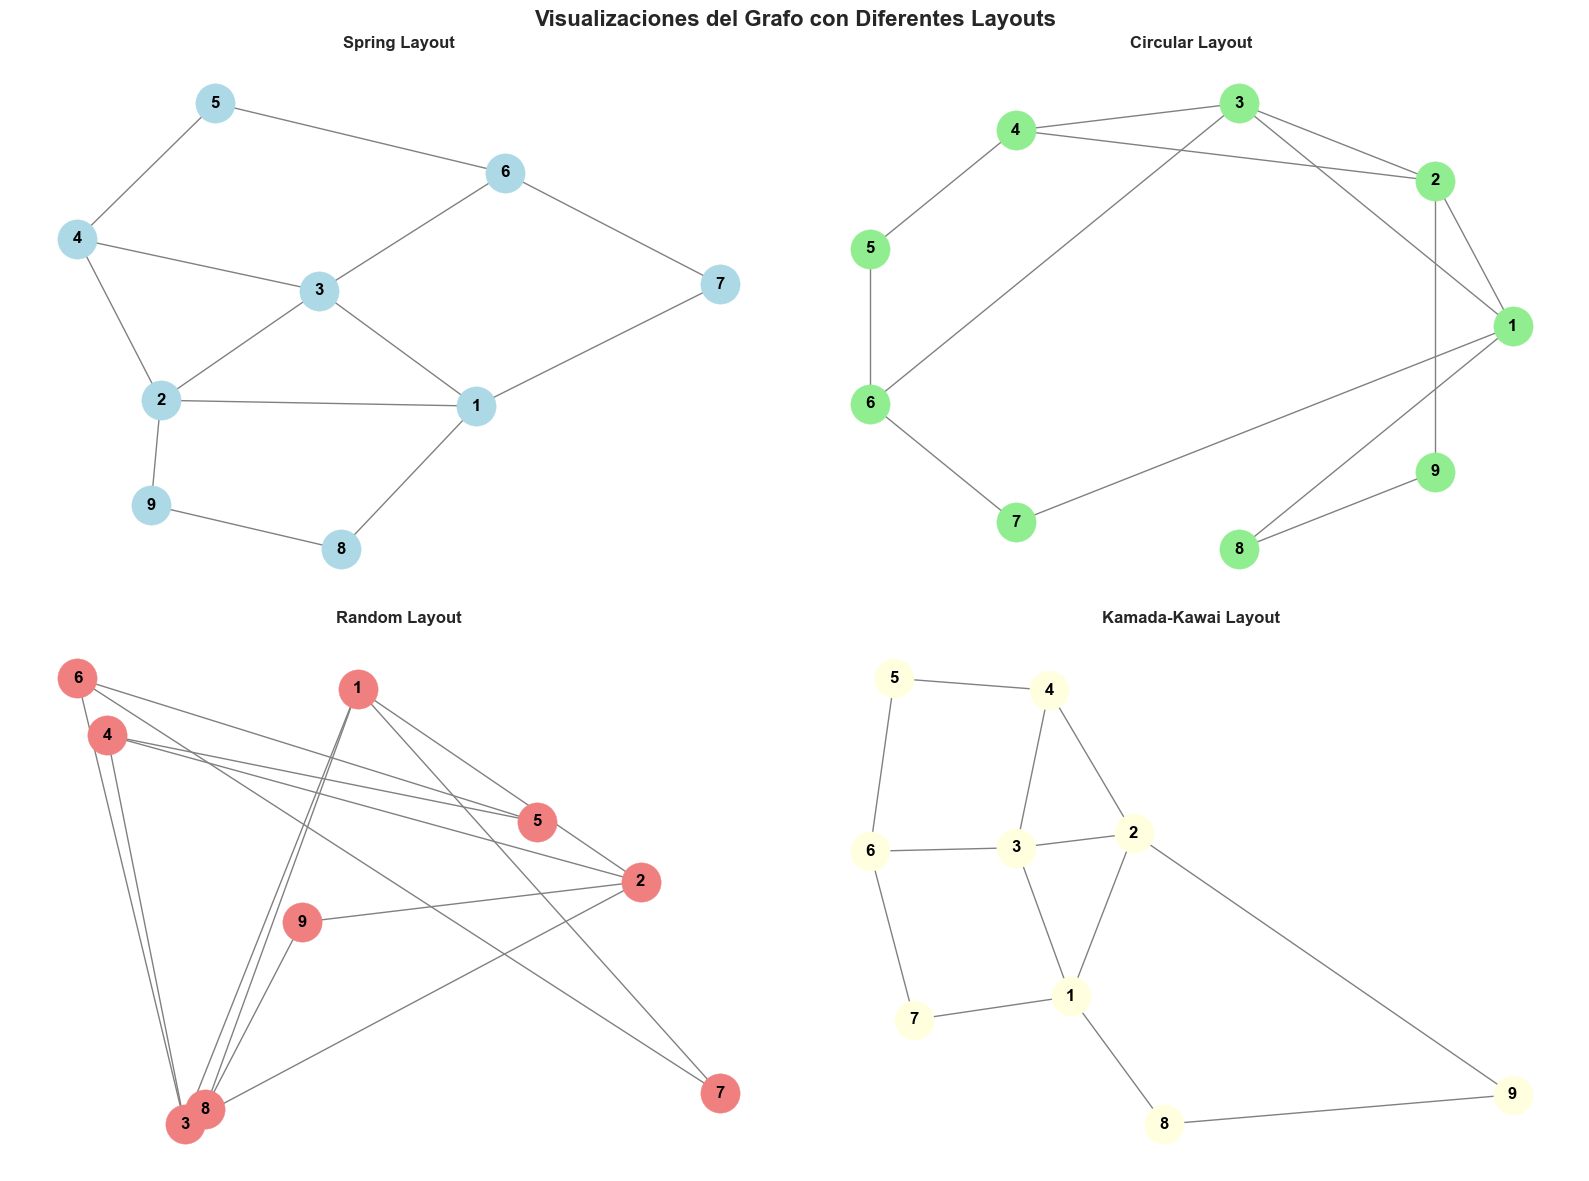

✅ Visualizaciones creadas exitosamente!


In [7]:
# Visualización del grafo con diferentes layouts
print("🎨 Creando visualizaciones del grafo...\n")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visualizaciones del Grafo con Diferentes Layouts', fontsize=16, fontweight='bold')

# Layout 1: Spring layout
pos1 = nx.spring_layout(G, seed=42)
axes[0,0].set_title('Spring Layout', fontweight='bold')
nx.draw(G, pos1, ax=axes[0,0], with_labels=True, node_color='lightblue', 
        node_size=800, font_size=12, font_weight='bold', edge_color='gray')

# Layout 2: Circular layout
pos2 = nx.circular_layout(G)
axes[0,1].set_title('Circular Layout', fontweight='bold')
nx.draw(G, pos2, ax=axes[0,1], with_labels=True, node_color='lightgreen', 
        node_size=800, font_size=12, font_weight='bold', edge_color='gray')

# Layout 3: Random layout
pos3 = nx.random_layout(G, seed=42)
axes[1,0].set_title('Random Layout', fontweight='bold')
nx.draw(G, pos3, ax=axes[1,0], with_labels=True, node_color='lightcoral', 
        node_size=800, font_size=12, font_weight='bold', edge_color='gray')

# Layout 4: Kamada-Kawai layout
pos4 = nx.kamada_kawai_layout(G)
axes[1,1].set_title('Kamada-Kawai Layout', fontweight='bold')
nx.draw(G, pos4, ax=axes[1,1], with_labels=True, node_color='lightyellow', 
        node_size=800, font_size=12, font_weight='bold', edge_color='gray')

plt.tight_layout()
plt.show()

print("✅ Visualizaciones creadas exitosamente!")

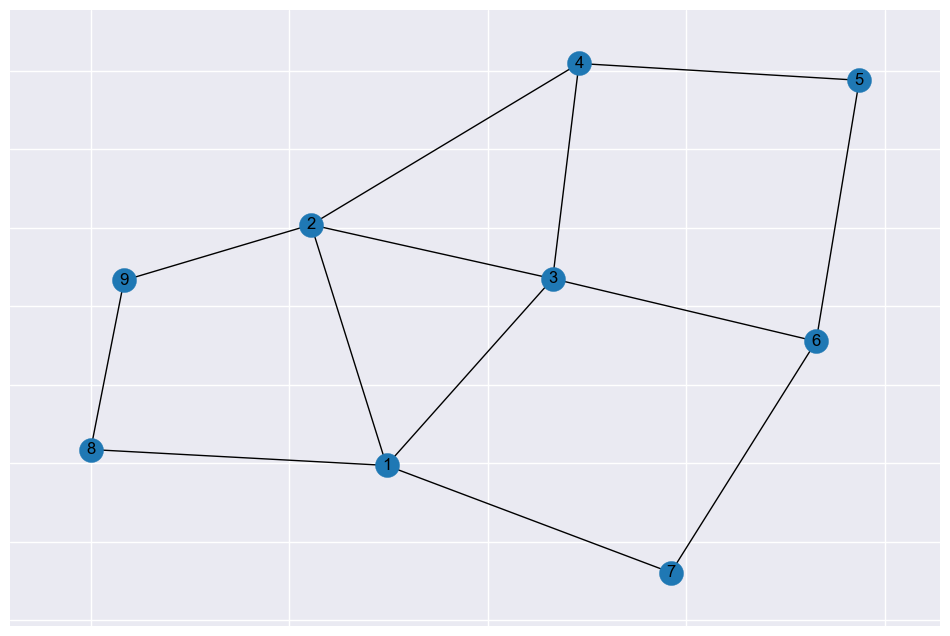

In [22]:
nx.draw_networkx(G)

In [ ]:
# Visualización avanzada con colores por grado y etiquetas de peso
print("🎨 Creando visualización avanzada con colores y pesos...\n")

plt.figure(figsize=(14, 10))

# Calcular posiciones
pos = nx.spring_layout(G, seed=42, k=2, iterations=50)

# Crear lista de colores basada en el grado de cada nodo
degrees = [G.degree(n) for n in G.nodes()]
node_colors = plt.cm.viridis(np.linspace(0, 1, len(set(degrees))))
color_map = {deg: color for deg, color in zip(sorted(set(degrees)), node_colors)}
node_color_list = [color_map[G.degree(n)] for n in G.nodes()]

# Crear lista de tamaños basada en el grado
node_sizes = [300 + 100 * G.degree(n) for n in G.nodes()]

# Dibujar el grafo
nx.draw_networkx_nodes(G, pos, node_color=node_color_list, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='white')
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.6, width=2)

# Añadir etiquetas de peso a las aristas que tienen peso
edge_labels = {}
for u, v, data in G.edges(data=True):
    if 'weight' in data:
        edge_labels[(u, v)] = f"{data['weight']:.1f}"

if edge_labels:
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10)

# Crear leyenda para los colores
import matplotlib.patches as mpatches
legend_elements = []
for degree in sorted(set(degrees)):
    legend_elements.append(mpatches.Patch(color=color_map[degree], 
                                        label=f'Grado {degree}'))

plt.legend(handles=legend_elements, title='Grado del Nodo', 
          loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Grafo con Colores por Grado y Etiquetas de Peso', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"📊 Información de la visualización:")
print(f"   Nodos coloreados por grado (de {min(degrees)} a {max(degrees)})")
print(f"   Tamaños de nodos proporcionales al grado")
print(f"   Aristas con pesos mostradas con etiquetas")
print("\n✅ Visualización avanzada completada!")

## 5. Algoritmos de Recorrido (BFS y DFS)

Implementaremos y visualizaremos los algoritmos de búsqueda en anchura (BFS) y búsqueda en profundidad (DFS).

In [26]:
# Implementación de BFS (Breadth-First Search)
def bfs_with_steps(graph, start_node):
    """
    Implementa BFS y devuelve los pasos del recorrido
    """
    visited = set()
    queue = deque([start_node])
    bfs_order = []
    steps = []
    
    print(f"🔍 Iniciando BFS desde el nodo {start_node}")
    
    while queue:
        current = queue.popleft()
        
        if current not in visited:
            visited.add(current)
            bfs_order.append(current)
            step_info = f"Visitando nodo {current}, Cola: {list(queue)}"
            steps.append(step_info)
            print(f"   {step_info}")
            
            # Añadir vecinos no visitados a la cola
            neighbors = [n for n in graph.neighbors(current) if n not in visited and n not in queue]
            queue.extend(neighbors)
    
    return bfs_order, steps

# Implementación de DFS (Depth-First Search)
def dfs_with_steps(graph, start_node):
    """
    Implementa DFS y devuelve los pasos del recorrido
    """
    visited = set()
    stack = [start_node]
    dfs_order = []
    steps = []
    
    print(f"🔍 Iniciando DFS desde el nodo {start_node}")
    
    while stack:
        current = stack.pop()
        
        if current not in visited:
            visited.add(current)
            dfs_order.append(current)
            step_info = f"Visitando nodo {current}, Pila: {stack}"
            steps.append(step_info)
            print(f"   {step_info}")
            
            # Añadir vecinos no visitados a la pila (en orden inverso para mantener orden)
            neighbors = [n for n in graph.neighbors(current) if n not in visited]
            neighbors.sort(reverse=True)  # Para consistencia visual
            stack.extend(neighbors)
    
    return dfs_order, steps

# Ejecutar los algoritmos
print("🚀 Ejecutando algoritmos de recorrido...\n")

start_node = 1
bfs_result, bfs_steps = bfs_with_steps(G, start_node)
print(f"\n✅ BFS completado: {bfs_result}")

print("\n" + "="*50 + "\n")

dfs_result, dfs_steps = dfs_with_steps(G, start_node)
print(f"\n✅ DFS completado: {dfs_result}")

print(f"\n📊 Comparación de resultados:")
print(f"   BFS orden: {bfs_result}")
print(f"   DFS orden: {dfs_result}")
print(f"   Nodos visitados (ambos): {len(bfs_result)}")

🚀 Ejecutando algoritmos de recorrido...

🔍 Iniciando BFS desde el nodo 1
   Visitando nodo 1, Cola: []
   Visitando nodo 2, Cola: [3, 7, 8]
   Visitando nodo 3, Cola: [7, 8, 4, 9]
   Visitando nodo 7, Cola: [8, 4, 9, 6]
   Visitando nodo 8, Cola: [4, 9, 6]
   Visitando nodo 4, Cola: [9, 6]
   Visitando nodo 9, Cola: [6, 5]
   Visitando nodo 6, Cola: [5]
   Visitando nodo 5, Cola: []

✅ BFS completado: [1, 2, 3, 7, 8, 4, 9, 6, 5]


🔍 Iniciando DFS desde el nodo 1
   Visitando nodo 1, Pila: []
   Visitando nodo 2, Pila: [8, 7, 3]
   Visitando nodo 3, Pila: [8, 7, 3, 9, 4]
   Visitando nodo 4, Pila: [8, 7, 3, 9, 4, 6]
   Visitando nodo 5, Pila: [8, 7, 3, 9, 4, 6]
   Visitando nodo 6, Pila: [8, 7, 3, 9, 4, 6]
   Visitando nodo 7, Pila: [8, 7, 3, 9, 4, 6]
   Visitando nodo 9, Pila: [8, 7, 3]
   Visitando nodo 8, Pila: [8, 7, 3]

✅ DFS completado: [1, 2, 3, 4, 5, 6, 7, 9, 8]

📊 Comparación de resultados:
   BFS orden: [1, 2, 3, 7, 8, 4, 9, 6, 5]
   DFS orden: [1, 2, 3, 4, 5, 6, 7, 9, 8]
   N

🎨 Creando visualización de los recorridos...



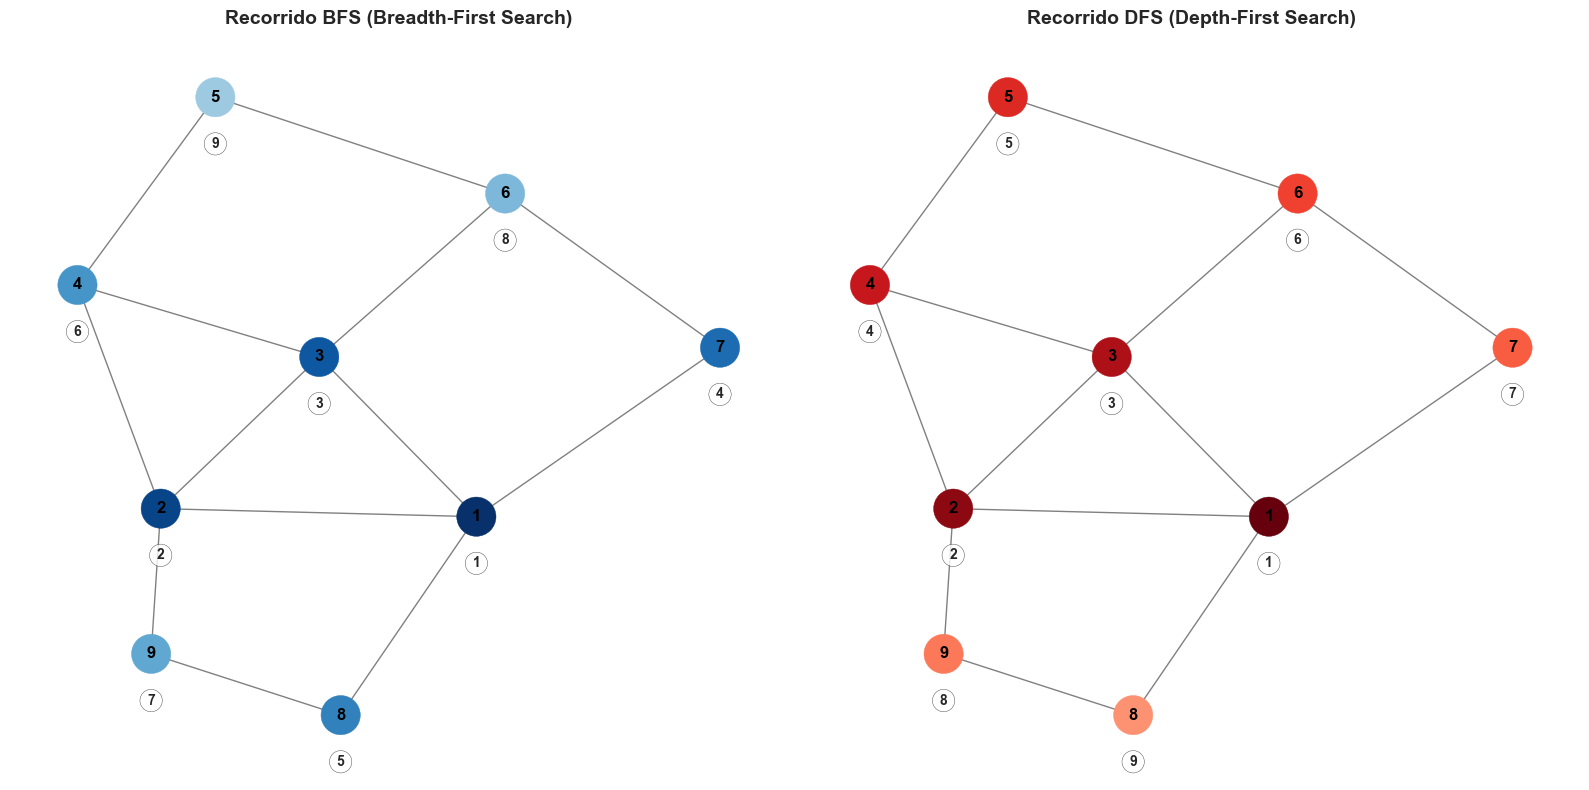

📋 Leyenda:
   - Colores más oscuros = visitados primero
   - Colores más claros = visitados después
   - Números = orden de visita
   - BFS: explora nivel por nivel
   - DFS: explora en profundidad antes de retroceder

✅ Visualización de recorridos completada!


In [27]:
# Visualización de los recorridos BFS y DFS
print("🎨 Creando visualización de los recorridos...\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
pos = nx.spring_layout(G, seed=42)

# Visualización BFS
ax1.set_title('Recorrido BFS (Breadth-First Search)', fontweight='bold', fontsize=14)
colors_bfs = []
for node in G.nodes():
    if node in bfs_result:
        # Color basado en el orden de visita
        order_index = bfs_result.index(node)
        color_intensity = 1 - (order_index / len(bfs_result))
        colors_bfs.append(plt.cm.Blues(0.3 + 0.7 * color_intensity))
    else:
        colors_bfs.append('lightgray')

nx.draw(G, pos, ax=ax1, node_color=colors_bfs, with_labels=True, 
        node_size=800, font_size=12, font_weight='bold', edge_color='gray')

# Añadir números de orden de visita para BFS
for i, node in enumerate(bfs_result):
    x, y = pos[node]
    ax1.text(x, y-0.15, str(i+1), ha='center', va='center', 
             fontweight='bold', bbox=dict(boxstyle='circle', facecolor='white', alpha=0.8))

# Visualización DFS
ax2.set_title('Recorrido DFS (Depth-First Search)', fontweight='bold', fontsize=14)
colors_dfs = []
for node in G.nodes():
    if node in dfs_result:
        # Color basado en el orden de visita
        order_index = dfs_result.index(node)
        color_intensity = 1 - (order_index / len(dfs_result))
        colors_dfs.append(plt.cm.Reds(0.3 + 0.7 * color_intensity))
    else:
        colors_dfs.append('lightgray')

nx.draw(G, pos, ax=ax2, node_color=colors_dfs, with_labels=True, 
        node_size=800, font_size=12, font_weight='bold', edge_color='gray')

# Añadir números de orden de visita para DFS
for i, node in enumerate(dfs_result):
    x, y = pos[node]
    ax2.text(x, y-0.15, str(i+1), ha='center', va='center', 
             fontweight='bold', bbox=dict(boxstyle='circle', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("📋 Leyenda:")
print("   - Colores más oscuros = visitados primero")
print("   - Colores más claros = visitados después")
print("   - Números = orden de visita")
print("   - BFS: explora nivel por nivel")
print("   - DFS: explora en profundidad antes de retroceder")
print("\n✅ Visualización de recorridos completada!")

## 6. Calcular Propiedades del Grafo

Vamos a explorar diferentes métricas y propiedades importantes del grafo.

In [ ]:
# Calcular propiedades básicas del grafo
print("📊 Calculando propiedades del grafo...\n")

# Propiedades básicas
print("🔹 PROPIEDADES BÁSICAS:")
print(f"   Número de nodos: {G.number_of_nodes()}")
print(f"   Número de aristas: {G.number_of_edges()}")
print(f"   Densidad: {nx.density(G):.4f}")
print(f"   Es conexo: {nx.is_connected(G)}")

# Grados
degrees = dict(G.degree())
print(f"\n🔹 ANÁLISIS DE GRADOS:")
print(f"   Grado promedio: {sum(degrees.values()) / len(degrees):.2f}")
print(f"   Grado máximo: {max(degrees.values())} (nodo {max(degrees, key=degrees.get)})")
print(f"   Grado mínimo: {min(degrees.values())} (nodos {[k for k, v in degrees.items() if v == min(degrees.values())]})")

# Centralidad de grado
degree_centrality = nx.degree_centrality(G)
print(f"\n🔹 CENTRALIDAD DE GRADO:")
for node, centrality in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"   Nodo {node}: {centrality:.4f}")

# Centralidad de intermediación (betweenness)
betweenness_centrality = nx.betweenness_centrality(G)
print(f"\n🔹 CENTRALIDAD DE INTERMEDIACIÓN:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"   Nodo {node}: {centrality:.4f}")

# Centralidad de cercanía (closeness)
closeness_centrality = nx.closeness_centrality(G)
print(f"\n🔹 CENTRALIDAD DE CERCANÍA:")
for node, centrality in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"   Nodo {node}: {centrality:.4f}")

# Distancias más cortas
print(f"\n🔹 CAMINOS MÁS CORTOS:")
print(f"   Diámetro del grafo: {nx.diameter(G)}")
print(f"   Radio del grafo: {nx.radius(G)}")
print(f"   Longitud promedio de camino: {nx.average_shortest_path_length(G):.4f}")

# Coeficiente de clustering
clustering = nx.clustering(G)
avg_clustering = nx.average_clustering(G)
print(f"\n🔹 CLUSTERING:")
print(f"   Coeficiente de clustering promedio: {avg_clustering:.4f}")
print(f"   Clustering por nodo (top 5):")
for node, coeff in sorted(clustering.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"      Nodo {node}: {coeff:.4f}")

print("\n✅ Análisis de propiedades completado!")

In [ ]:
# Visualización de centralidades
print("🎨 Visualizando diferentes medidas de centralidad...\n")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visualización de Medidas de Centralidad', fontsize=16, fontweight='bold')

pos = nx.spring_layout(G, seed=42)

# Centralidad de grado
ax1 = axes[0,0]
degree_values = list(degree_centrality.values())
degree_colors = plt.cm.Reds(np.linspace(0.3, 1, len(degree_values)))
degree_sorted = sorted(zip(G.nodes(), degree_values))
node_colors_degree = [degree_colors[i] for i, (node, _) in enumerate(degree_sorted)]

nx.draw(G, pos, ax=ax1, node_color=[degree_centrality[n] for n in G.nodes()], 
        cmap=plt.cm.Reds, with_labels=True, node_size=800, 
        font_size=10, font_weight='bold', edge_color='gray')
ax1.set_title('Centralidad de Grado', fontweight='bold')

# Centralidad de intermediación
ax2 = axes[0,1]
nx.draw(G, pos, ax=ax2, node_color=[betweenness_centrality[n] for n in G.nodes()], 
        cmap=plt.cm.Blues, with_labels=True, node_size=800, 
        font_size=10, font_weight='bold', edge_color='gray')
ax2.set_title('Centralidad de Intermediación', fontweight='bold')

# Centralidad de cercanía
ax3 = axes[1,0]
nx.draw(G, pos, ax=ax3, node_color=[closeness_centrality[n] for n in G.nodes()], 
        cmap=plt.cm.Greens, with_labels=True, node_size=800, 
        font_size=10, font_weight='bold', edge_color='gray')
ax3.set_title('Centralidad de Cercanía', fontweight='bold')

# Clustering por nodo
ax4 = axes[1,1]
nx.draw(G, pos, ax=ax4, node_color=[clustering[n] for n in G.nodes()], 
        cmap=plt.cm.Purples, with_labels=True, node_size=800, 
        font_size=10, font_weight='bold', edge_color='gray')
ax4.set_title('Coeficiente de Clustering', fontweight='bold')

plt.tight_layout()
plt.show()

print("📋 Interpretación de las visualizaciones:")
print("   🔴 Rojo (Centralidad de Grado): Nodos más conectados")
print("   🔵 Azul (Intermediación): Nodos que actúan como 'puentes'")
print("   🟢 Verde (Cercanía): Nodos más 'cercanos' al resto")
print("   🟣 Morado (Clustering): Nodos con vecinos más conectados entre sí")
print("\n✅ Visualización de centralidades completada!")

## 7. Operaciones Avanzadas con Grafos

Exploraremos operaciones más avanzadas como detección de componentes, ciclos y coloración de grafos.

In [ ]:
# Operaciones avanzadas con grafos
print("🔬 Realizando operaciones avanzadas...\n")

# 1. Componentes conexas
print("🔹 COMPONENTES CONEXAS:")
if nx.is_connected(G):
    print(f"   El grafo es conexo (1 componente)")
    components = [set(G.nodes())]
else:
    components = list(nx.connected_components(G))
    print(f"   Número de componentes conexas: {len(components)}")
    for i, component in enumerate(components, 1):
        print(f"   Componente {i}: {component}")

# 2. Detección de ciclos
print(f"\n🔹 DETECCIÓN DE CICLOS:")
cycles = list(nx.simple_cycles(nx.DiGraph(G)))  # Convertir a dirigido para detectar ciclos
try:
    cycle_basis = nx.cycle_basis(G)
    print(f"   Número de ciclos básicos: {len(cycle_basis)}")
    if cycle_basis:
        print(f"   Primer ciclo encontrado: {cycle_basis[0]}")
    
    # Verificar si es un grafo bipartito (sin ciclos impares)
    is_bipartite = nx.is_bipartite(G)
    print(f"   Es bipartito (sin ciclos impares): {is_bipartite}")
except:
    print("   No se pudieron detectar ciclos (grafo puede ser un árbol)")

# 3. Coloración de grafos
print(f"\n🔹 COLORACIÓN DE GRAFOS:")
try:
    # Coloración greedy
    coloring = nx.coloring.greedy_color(G, strategy='largest_first')
    num_colors = len(set(coloring.values()))
    print(f"   Número de colores necesarios: {num_colors}")
    print(f"   Coloración por nodo:")
    for node, color in sorted(coloring.items()):
        print(f"      Nodo {node}: Color {color}")
        
    # Número cromático (límite inferior)
    max_clique_size = len(max(nx.find_cliques(G), key=len))
    print(f"   Tamaño de la clique máxima: {max_clique_size}")
    print(f"   Número cromático ≥ {max_clique_size}")
    
except Exception as e:
    print(f"   Error en coloración: {e}")

# 4. Árboles de expansión mínima (MST)
print(f"\n🔹 ÁRBOL DE EXPANSIÓN MÍNIMA:")
if nx.is_connected(G):
    # Añadir pesos aleatorios para demostrar MST
    for u, v in G.edges():
        if 'weight' not in G[u][v]:
            G[u][v]['weight'] = np.random.randint(1, 10)
    
    mst = nx.minimum_spanning_tree(G)
    print(f"   Nodos en MST: {mst.number_of_nodes()}")
    print(f"   Aristas en MST: {mst.number_of_edges()}")
    print(f"   Peso total del MST: {sum([data['weight'] for _, _, data in mst.edges(data=True)])}")
    print(f"   Aristas del MST: {list(mst.edges())}")
else:
    print("   El grafo no es conexo, no se puede crear MST")

# 5. Caminos más cortos
print(f"\n🔹 CAMINOS MÁS CORTOS:")
source = 1
target = 7
try:
    shortest_path = nx.shortest_path(G, source, target)
    path_length = nx.shortest_path_length(G, source, target)
    print(f"   Camino más corto de {source} a {target}: {shortest_path}")
    print(f"   Longitud del camino: {path_length}")
    
    # Todos los caminos más cortos desde un nodo
    all_shortest = nx.single_source_shortest_path_length(G, source)
    print(f"   Distancias desde nodo {source}:")
    for node, distance in sorted(all_shortest.items()):
        print(f"      A nodo {node}: {distance}")
        
except nx.NetworkXNoPath:
    print(f"   No hay camino entre {source} y {target}")

print("\n✅ Operaciones avanzadas completadas!")

In [ ]:
# Visualización de operaciones avanzadas
print("🎨 Visualizando operaciones avanzadas...\n")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visualización de Operaciones Avanzadas', fontsize=16, fontweight='bold')

pos = nx.spring_layout(G, seed=42)

# 1. Coloración del grafo
ax1 = axes[0,0]
ax1.set_title('Coloración del Grafo', fontweight='bold')
if 'coloring' in locals():
    color_map = plt.cm.Set3(np.linspace(0, 1, num_colors))
    node_colors_coloring = [color_map[coloring[node]] for node in G.nodes()]
    nx.draw(G, pos, ax=ax1, node_color=node_colors_coloring, 
            with_labels=True, node_size=800, font_size=10, 
            font_weight='bold', edge_color='gray')
    # Añadir etiquetas de color
    for node in G.nodes():
        x, y = pos[node]
        ax1.text(x, y-0.15, f"C{coloring[node]}", ha='center', va='center', 
                fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. Árbol de Expansión Mínima
ax2 = axes[0,1]
ax2.set_title('Árbol de Expansión Mínima (MST)', fontweight='bold')
if 'mst' in locals():
    # Dibujar todas las aristas en gris claro
    nx.draw_networkx_edges(G, pos, ax=ax2, edge_color='lightgray', alpha=0.3)
    # Dibujar aristas del MST en rojo
    nx.draw_networkx_edges(mst, pos, ax=ax2, edge_color='red', width=3)
    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, ax=ax2, node_color='lightblue', node_size=800)
    nx.draw_networkx_labels(G, pos, ax=ax2, font_size=10, font_weight='bold')

# 3. Camino más corto
ax3 = axes[1,0]
ax3.set_title(f'Camino Más Corto: {source} → {target}', fontweight='bold')
# Dibujar todas las aristas
nx.draw_networkx_edges(G, pos, ax=ax3, edge_color='lightgray', alpha=0.5)
# Resaltar el camino más corto
if 'shortest_path' in locals():
    path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
    nx.draw_networkx_edges(G, pos, ax=ax3, edgelist=path_edges, 
                          edge_color='orange', width=4)
    
    # Colorear nodos del camino
    node_colors_path = []
    for node in G.nodes():
        if node == source:
            node_colors_path.append('green')
        elif node == target:
            node_colors_path.append('red')
        elif node in shortest_path:
            node_colors_path.append('yellow')
        else:
            node_colors_path.append('lightgray')
    
    nx.draw_networkx_nodes(G, pos, ax=ax3, node_color=node_colors_path, node_size=800)
    nx.draw_networkx_labels(G, pos, ax=ax3, font_size=10, font_weight='bold')

# 4. Centralidad de intermediación con tamaño de nodo
ax4 = axes[1,1]
ax4.set_title('Nodos por Centralidad de Intermediación', fontweight='bold')
node_sizes_betweenness = [300 + 1000 * betweenness_centrality[node] for node in G.nodes()]
nx.draw(G, pos, ax=ax4, node_size=node_sizes_betweenness, 
        node_color=[betweenness_centrality[n] for n in G.nodes()],
        cmap=plt.cm.YlOrRd, with_labels=True, font_size=8, 
        font_weight='bold', edge_color='gray')

plt.tight_layout()
plt.show()

print("📋 Leyenda de las visualizaciones:")
print("   🎨 Coloración: Colores diferentes = no pueden ser adyacentes")
print("   🌳 MST: Aristas rojas = árbol de expansión mínima")
print("   🛤️  Camino: Verde=origen, Rojo=destino, Naranja=camino óptimo")
print("   📏 Centralidad: Tamaño = importancia como 'puente'")
print("\n✅ Visualización de operaciones avanzadas completada!")

## Resumen y Conclusiones

Este notebook ha demostrado las principales funcionalidades de los grafos en Python usando NetworkX:

### 🎯 **Funcionalidades Cubiertas:**

1. **Creación de Grafos**: Dirigidos, no dirigidos, con pesos y multigrafos
2. **Manipulación**: Adición de nodos y aristas con atributos
3. **Visualización**: Múltiples layouts y estilos de presentación
4. **Algoritmos de Recorrido**: BFS y DFS con visualización paso a paso
5. **Métricas de Centralidad**: Grado, intermediación y cercanía
6. **Operaciones Avanzadas**: Coloración, MST, caminos más cortos

### 🔍 **Propiedades Analizadas:**
- Conectividad y componentes
- Distribución de grados
- Coeficientes de clustering
- Detección de ciclos
- Distancias y diámetros

### 🛠️ **Herramientas Utilizadas:**
- **NetworkX**: Biblioteca principal para grafos
- **Matplotlib**: Visualizaciones estáticas
- **NumPy**: Operaciones numéricas
- **Collections**: Estructuras de datos auxiliares

### 📚 **Aplicaciones Prácticas:**
Los grafos son fundamentales en:
- **Redes sociales**: Análisis de conexiones y influencia
- **Transporte**: Optimización de rutas y logística
- **Bioinformática**: Redes de proteínas y genéticas
- **Internet**: Estructura web y algoritmos de búsqueda
- **Economía**: Redes comerciales y flujos financieros

¡Explora más con diferentes tipos de grafos y algoritmos especializados! 🚀